## Importing necessary libraries

In [1]:
#Ignoring the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing necessary document
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


## Defining and combining file paths

In [3]:
# Defining the data set location
csv_location = "../CM2606-CW/"
csv_1_name = "col_mat_nuw_output.csv"
csv_2_name = "kan_output.csv"
csv_3_name = "mon_kur_jaf_output.csv"
csv_name_table_1 = (csv_location + csv_1_name)
csv_name_table_2 = (csv_location + csv_2_name)
csv_name_table_3 = (csv_location + csv_3_name)


In [4]:
# Defining the column name
column_names = ['HCHO Level', 'Location', 'Start Date', 'End Date']

In [5]:
# Reading the CSV file
table_1 = pd.read_csv(csv_name_table_1, names=column_names, header = None) 
table_2 = pd.read_csv(csv_name_table_2, names=column_names, header = None) 
table_3 = pd.read_csv(csv_name_table_3, names=column_names, header = None) 


## For the table 1

In [6]:
# Printing the table 1
table_1.head()

HCHO Level        Location  Start Date    End Date
0    0.000197  Colombo Proper  2019-01-01  2019-01-02
1    0.000263  Colombo Proper  2019-01-02  2019-01-03
2    0.000099  Colombo Proper  2019-01-03  2019-01-04
3    0.000210  Colombo Proper  2019-01-04  2019-01-05
4    0.000179  Colombo Proper  2019-01-05  2019-01-06

In [7]:
# Printing the shape of the table 1
table_1.shape

(5478, 4)

In [8]:
# Checking the shape of the table 1
table_1.dtypes

HCHO Level    float64
Location       object
Start Date     object
End Date       object
dtype: object

In [9]:
# Checking if there is any null values in the table 1
table_1.isnull().sum()

HCHO Level    2419
Location         0
Start Date       0
End Date         0
dtype: int64

## For the table 2

In [10]:
# Printing the table 2
table_2.head()

HCHO Level      Location  Start Date    End Date
0    0.000176  Kandy Proper  2019-01-01  2019-01-02
1    0.000092  Kandy Proper  2019-01-02  2019-01-03
2         NaN  Kandy Proper  2019-01-03  2019-01-04
3    0.000191  Kandy Proper  2019-01-04  2019-01-05
4    0.000122  Kandy Proper  2019-01-05  2019-01-06

In [11]:
# Checking if the shape of the table 2
table_2.shape

(1826, 4)

In [12]:
# Checking data types in the table 2
table_2.dtypes

HCHO Level    float64
Location       object
Start Date     object
End Date       object
dtype: object

In [13]:
# Checking if there is any null values in the table 2
table_2.isnull().sum()

HCHO Level    793
Location        0
Start Date      0
End Date        0
dtype: int64

## For the table 3

In [14]:
# Printing the table 1
table_3.head()

HCHO Level            Location  Start Date    End Date
0         NaN  Bibile, Monaragala  2019-01-01  2019-01-02
1    0.000019  Bibile, Monaragala  2019-01-02  2019-01-03
2    0.000028  Bibile, Monaragala  2019-01-03  2019-01-04
3    0.000037  Bibile, Monaragala  2019-01-04  2019-01-05
4   -0.000018  Bibile, Monaragala  2019-01-05  2019-01-06

In [15]:
# Checking the shape of the table 3
table_3.shape

(5478, 4)

In [16]:
# Checking data types in the table 3
table_3.dtypes

HCHO Level    float64
Location       object
Start Date     object
End Date       object
dtype: object

In [17]:
# Checking if there is any null values in the table 1
table_3.isnull().sum()

HCHO Level    1652
Location         0
Start Date       0
End Date         0
dtype: int64

## Merging the data

In [18]:
merged_data = pd.concat([table_1, table_2, table_3], ignore_index=True)


In [19]:
# Printing the merged data
merged_data

HCHO Level        Location  Start Date    End Date
0        0.000197  Colombo Proper  2019-01-01  2019-01-02
1        0.000263  Colombo Proper  2019-01-02  2019-01-03
2        0.000099  Colombo Proper  2019-01-03  2019-01-04
3        0.000210  Colombo Proper  2019-01-04  2019-01-05
4        0.000179  Colombo Proper  2019-01-05  2019-01-06
...           ...             ...         ...         ...
12777         NaN   Jaffna Proper  2023-12-27  2023-12-28
12778    0.000051   Jaffna Proper  2023-12-28  2023-12-29
12779    0.000127   Jaffna Proper  2023-12-29  2023-12-30
12780    0.000117   Jaffna Proper  2023-12-30  2023-12-31
12781    0.000065   Jaffna Proper  2023-12-31  2024-01-01

[12782 rows x 4 columns]

In [20]:
# Checking the shape of the graph
merged_data.shape

(12782, 4)

In [21]:
# Checking the data types in each column
merged_data.dtypes

HCHO Level    float64
Location       object
Start Date     object
End Date       object
dtype: object

In [22]:
# Checking the number of null values
merged_data.isnull().sum()

HCHO Level    4864
Location         0
Start Date       0
End Date         0
dtype: int64

In [23]:
# Checking unique values for the location
unique_location_counts = merged_data["Location"].value_counts()
unique_location_counts

Location
Colombo Proper         1826
Deniyaya, Matara       1826
Nuwara Eliya Proper    1826
Kandy Proper           1826
Bibile, Monaragala     1826
Kurunegala Proper      1826
Jaffna Proper          1826
Name: count, dtype: int64

## Adding Covid Data to the data frame

When taking lockdowns for region, if there are are few places in that disctict had curfew, the whole district is considered as the curfew.

In [24]:
# selected_dates = pd.date_range(start='2019-01-01', end='2023-12-31', freq='D')

# # Create a new column named 'Selected' and initialize it with zeros
# merged_data['Covid Lockdowns'] = 0

# # Set the values in the 'Selected' column to 1 for the selected dates
# merged_data.loc[merged_data['Start Date'].isin(selected_dates), 'Covid Lockdowns'] = 1

# selected_region = 
# df.loc[(merged_data['Start Date'].isin(selected_dates)) & (merged_data['Location'] == selected_region), 'Selected'] = 1


# # Display the data frame with the new column
# print(merged_data)

## Adding Urban Population to the data frame

In [25]:
# Colombo 
selected_region = 'Colombo Proper'
urban_population_value = 5600000
# merged_data.loc[(merged_data['Start Date'].isin(selected_dates)) & (merged_data['Location'] == selected_region), 'Selected'] = 5600000
merged_data.loc[merged_data['Location'] == selected_region, 'Urban Population'] = urban_population_value

# Deniyaya, Matara 
selected_region = 'Deniyaya, Matara'
urban_population_value = 45684
merged_data.loc[merged_data['Location'] == selected_region, 'Urban Population'] = urban_population_value

# Nuwara Eliya Proper 
selected_region = 'Nuwara Eliya Proper'
urban_population_value = 48615
merged_data.loc[merged_data['Location'] == selected_region, 'Urban Population'] = urban_population_value

# Kandy Proper 
selected_region = 'Kandy Proper'
urban_population_value = 170544
merged_data.loc[merged_data['Location'] == selected_region, 'Urban Population'] = urban_population_value

# Bibile, Monaragala 
selected_region = 'Bibile, Monaragala'
urban_population_value = 1761
merged_data.loc[merged_data['Location'] == selected_region, 'Urban Population'] = urban_population_value

# Kurunegala Proper  
selected_region = 'Kurunegala Proper'
urban_population_value = 30000
merged_data.loc[merged_data['Location'] == selected_region, 'Urban Population'] = urban_population_value

# Jaffna Proper  
selected_region = 'Jaffna Proper'
urban_population_value = 54994
merged_data.loc[merged_data['Location'] == selected_region, 'Urban Population'] = urban_population_value


In [26]:
# Display the data frame with the new column
merged_data['Urban Population'] = merged_data['Urban Population'].astype(int)
merged_data

HCHO Level        Location  Start Date    End Date  Urban Population
0        0.000197  Colombo Proper  2019-01-01  2019-01-02           5600000
1        0.000263  Colombo Proper  2019-01-02  2019-01-03           5600000
2        0.000099  Colombo Proper  2019-01-03  2019-01-04           5600000
3        0.000210  Colombo Proper  2019-01-04  2019-01-05           5600000
4        0.000179  Colombo Proper  2019-01-05  2019-01-06           5600000
...           ...             ...         ...         ...               ...
12777         NaN   Jaffna Proper  2023-12-27  2023-12-28             54994
12778    0.000051   Jaffna Proper  2023-12-28  2023-12-29             54994
12779    0.000127   Jaffna Proper  2023-12-29  2023-12-30             54994
12780    0.000117   Jaffna Proper  2023-12-30  2023-12-31             54994
12781    0.000065   Jaffna Proper  2023-12-31  2024-01-01             54994

[12782 rows x 5 columns]

## Adding Average Elevation of the region to the data frame

In [27]:
# Colombo 
selected_region = 'Colombo Proper'
average_elevation = 5
# merged_data.loc[(merged_data['Start Date'].isin(selected_dates)) & (merged_data['Location'] == selected_region), 'Selected'] = 5600000
merged_data.loc[merged_data['Location'] == selected_region, 'Average Elevation'] = average_elevation

# Deniyaya, Matara 
selected_region = 'Deniyaya, Matara'
average_elevation = 7
merged_data.loc[merged_data['Location'] == selected_region, 'Average Elevation'] = average_elevation

# Nuwara Eliya Proper 
selected_region = 'Nuwara Eliya Proper'
average_elevation = 1426
merged_data.loc[merged_data['Location'] == selected_region, 'Average Elevation'] = average_elevation

# Kandy Proper 
selected_region = 'Kandy Proper'
average_elevation = 621
merged_data.loc[merged_data['Location'] == selected_region, 'Average Elevation'] = average_elevation

# Bibile, Monaragala 
selected_region = 'Bibile, Monaragala'
average_elevation = 233
merged_data.loc[merged_data['Location'] == selected_region, 'Average Elevation'] = average_elevation

# Kurunegala Proper  
selected_region = 'Kurunegala Proper'
average_elevation = 146
merged_data.loc[merged_data['Location'] == selected_region, 'Average Elevation'] = average_elevation

# Jaffna Proper  
selected_region = 'Jaffna Proper'
average_elevation = 3
merged_data.loc[merged_data['Location'] == selected_region, 'Average Elevation'] = average_elevation


In [28]:
# Display the data frame with the new column
merged_data['Average Elevation'] = merged_data['Average Elevation'].astype(int)
print(merged_data)

       HCHO Level        Location  Start Date    End Date  Urban Population  \
0        0.000197  Colombo Proper  2019-01-01  2019-01-02           5600000   
1        0.000263  Colombo Proper  2019-01-02  2019-01-03           5600000   
2        0.000099  Colombo Proper  2019-01-03  2019-01-04           5600000   
3        0.000210  Colombo Proper  2019-01-04  2019-01-05           5600000   
4        0.000179  Colombo Proper  2019-01-05  2019-01-06           5600000   
...           ...             ...         ...         ...               ...   
12777         NaN   Jaffna Proper  2023-12-27  2023-12-28             54994   
12778    0.000051   Jaffna Proper  2023-12-28  2023-12-29             54994   
12779    0.000127   Jaffna Proper  2023-12-29  2023-12-30             54994   
12780    0.000117   Jaffna Proper  2023-12-30  2023-12-31             54994   
12781    0.000065   Jaffna Proper  2023-12-31  2024-01-01             54994   

       Average Elevation  
0                      5

## Calculates and presenting relevant statistics

In [29]:
## Calculates and presenting relevant statistics
statistics = merged_data.describe().T
statistics

count           mean           std          min  \
HCHO Level          7918.0       0.000119  9.322341e-05    -0.000352   
Urban Population   12782.0  850228.285714  1.939783e+06  1761.000000   
Average Elevation  12782.0     348.714286  4.845796e+02     3.000000   

                            25%           50%            75%           max  
HCHO Level             0.000061      0.000112       0.000172  8.997102e-04  
Urban Population   30000.000000  48615.000000  170544.000000  5.600000e+06  
Average Elevation      5.000000    146.000000     621.000000  1.426000e+03

## Plotting the data

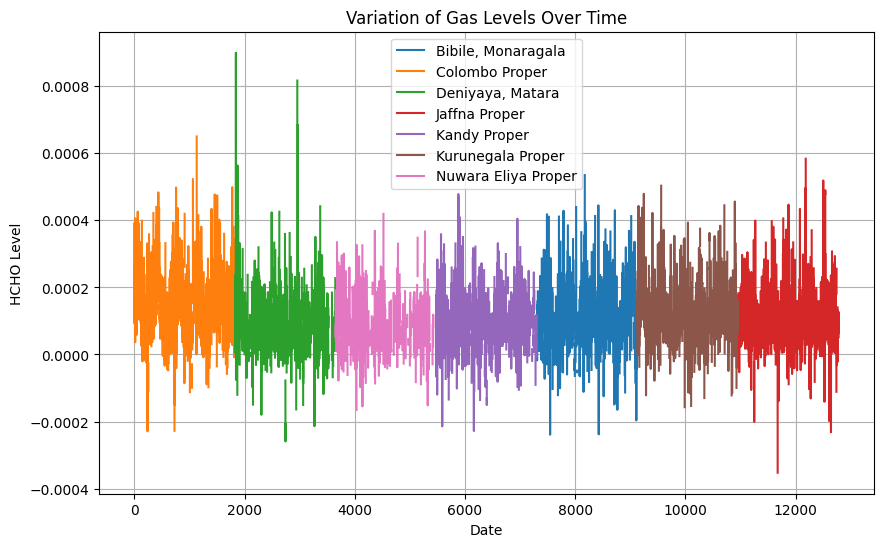

In [30]:
# Plotting the data of HCHO by different location vs HCHO level
# Group the data by location
grouped_data = merged_data.groupby('Location')

# Plot the variation of gas levels for each location
fig, ax = plt.subplots(figsize=(10, 6))
for location, group in grouped_data:
    group['HCHO Level'].plot(ax=ax, label=location)

# Customize the plot
plt.title('Variation of Gas Levels Over Time')
plt.xlabel('Date')
plt.ylabel('HCHO Level')
plt.legend()
plt.grid(True)
plt.show()


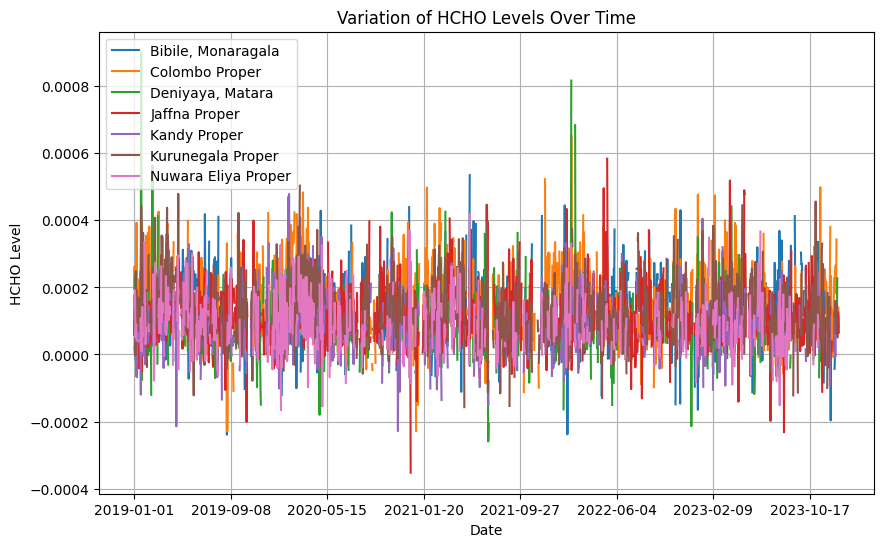

In [31]:
# Plottimng the data on top of each other for different locations vs HCHO level in the same graph

# Group the data by location
grouped_data = merged_data.groupby('Location')

# Plot the variation of gas levels for each location
fig, ax = plt.subplots(figsize=(10, 6))
for location, group in grouped_data:
    group.plot(x='Start Date', y='HCHO Level', ax=ax, label=location)

# Customize the plot
plt.title('Variation of HCHO Levels Over Time')
plt.xlabel('Date')
plt.ylabel('HCHO Level')
plt.legend()
plt.grid(True)
plt.show()

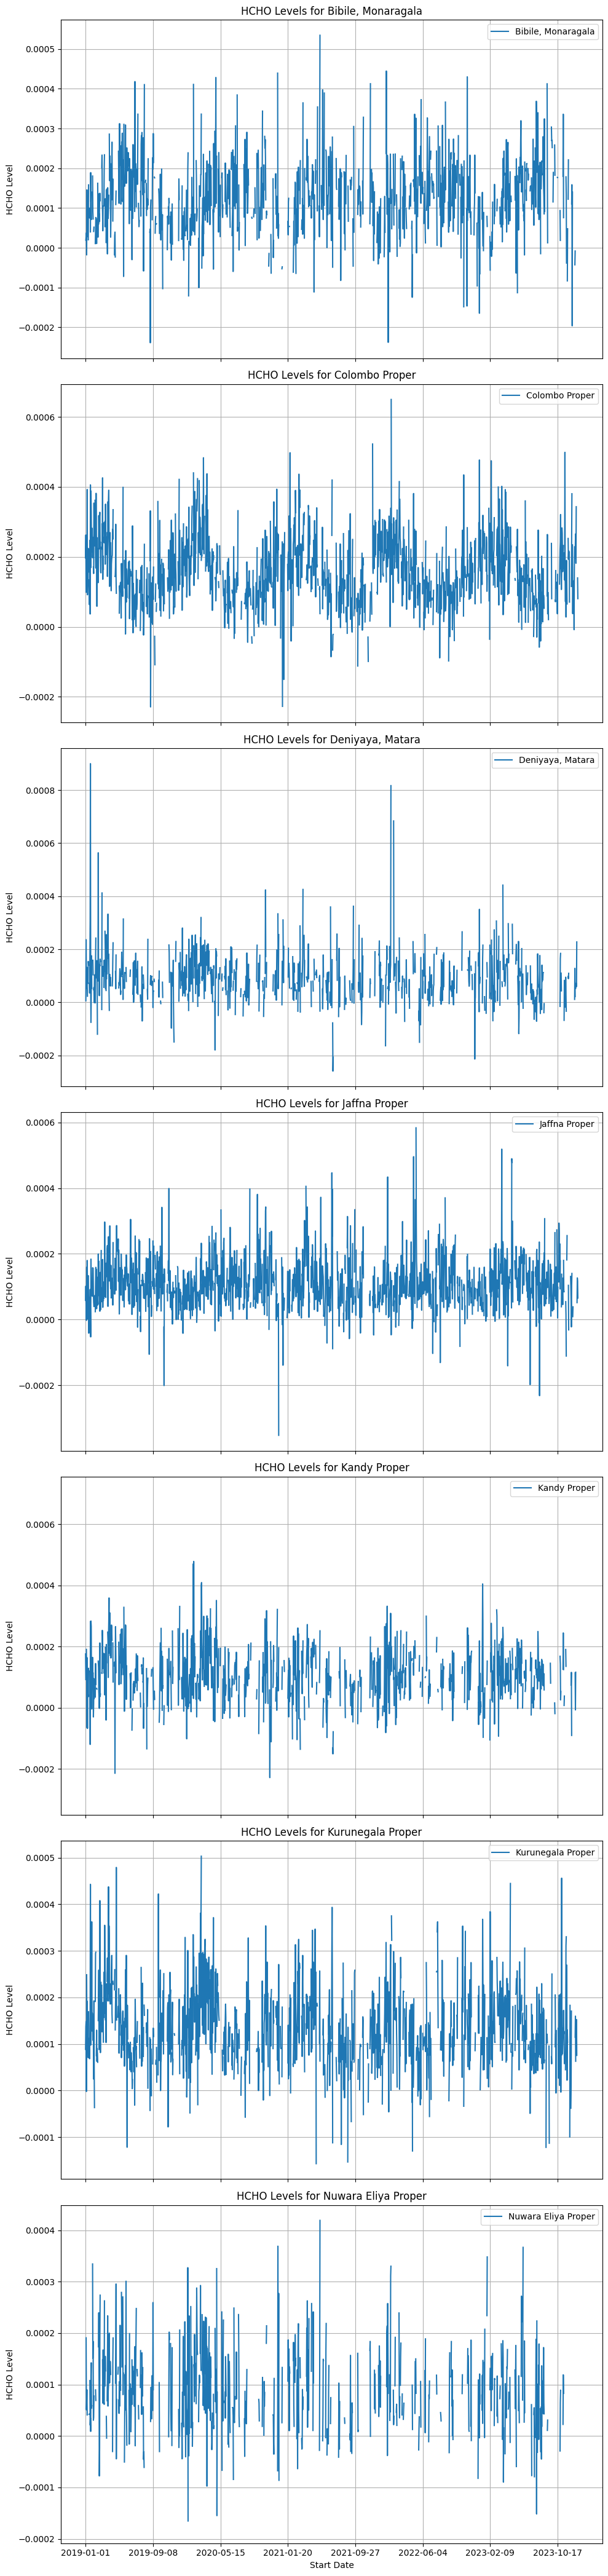

In [32]:
# Plotting the data one by one for different locations vs HCHO level in different graphs

# Grouping the data by location
grouped_data = merged_data.groupby('Location')

# Create subplots for each location
fig, axs = plt.subplots(len(grouped_data), 1, figsize=(10, 6*len(grouped_data)), sharex=True)

# Plot the variation of gas levels for each location
for i, (location, group) in enumerate(grouped_data):
    group.plot(x='Start Date', y='HCHO Level', ax=axs[i], label=location)
    axs[i].set_title(f'HCHO Levels for {location}')
    axs[i].set_ylabel('HCHO Level')
    axs[i].legend()
    axs[i].grid(True)

# Set common xlabel
plt.xlabel('Start Date')

# Adjust layout
plt.tight_layout()

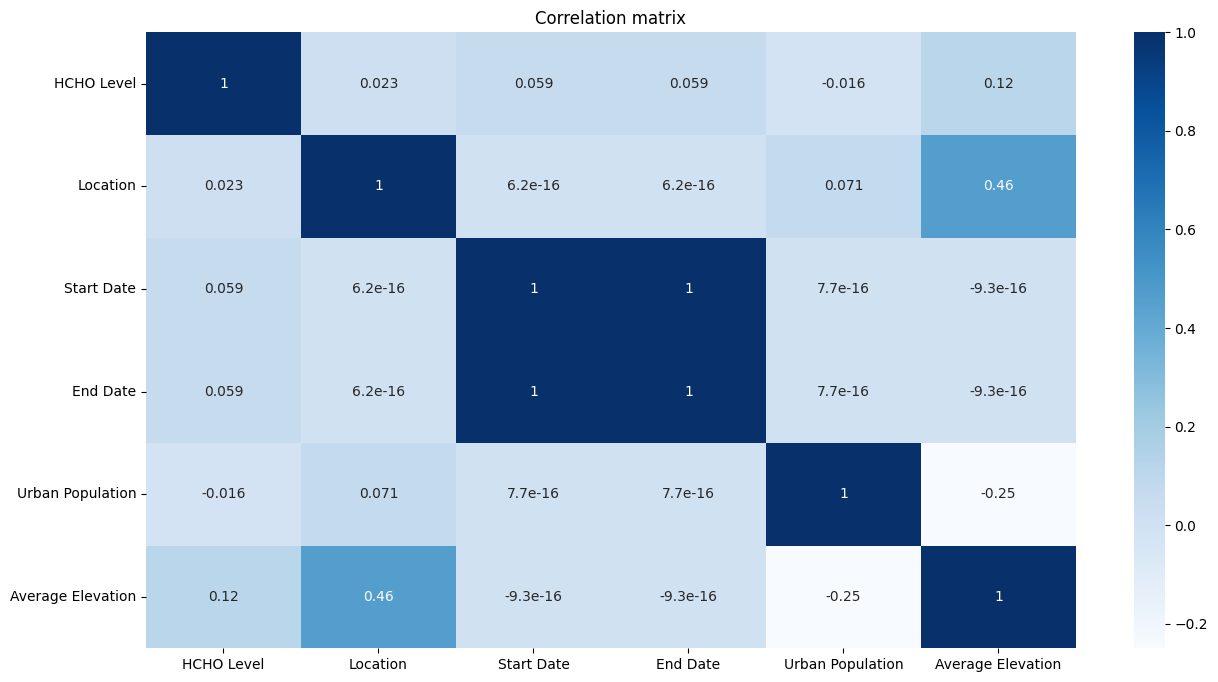

In [33]:
# Make a copy of the DataFrame to avoid modifying the original
temp_df = merged_data.copy()

# List of categorical columns to encode
categorical_columns = ["HCHO Level", "Location", "Start Date", "End Date", "Urban Population", "Average Elevation"]

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode each categorical column separately
for column in categorical_columns:
    temp_df[column] = label_encoder.fit_transform(temp_df[column])

# Plot correlation heatmap
plt.figure(figsize=(15, 8))
plt.title("Correlation matrix")
sns.heatmap(temp_df.corr(method='pearson'), annot=True, cmap="Blues")
plt.show()

## Removing End Date column

Removing the end date column is because only the start date is required for the analysis, and storing unnecessary information during the analysis uses more processing power and resources in the computer.

In [34]:
merged_data.drop(columns=['End Date'], inplace=True)

In [35]:
# Checking the data types after removing the end date column
merged_data.dtypes

HCHO Level           float64
Location              object
Start Date            object
Urban Population       int32
Average Elevation      int32
dtype: object

## Renaming the start date column

In [36]:
merged_data.rename(columns={'Start Date': 'Date'}, inplace=True)

## Seperating each regions from the main dataframes

In [37]:
# Seperating the data sets for different locations
colombo_data = merged_data[merged_data['Location'] == 'Colombo Proper']
deniyaya_matara_data = merged_data[merged_data['Location'] == 'Deniyaya, Matara']
nuwara_eliya_data = merged_data[merged_data['Location'] == 'Nuwara Eliya Proper']
kandy_data = merged_data[merged_data['Location'] == 'Kandy Proper']
bibile_monaragala_data = merged_data[merged_data['Location'] == 'Bibile, Monaragala']
kurunegala_data = merged_data[merged_data['Location'] == 'Kurunegala Proper']
jaffna_data = merged_data[merged_data['Location'] == 'Jaffna Proper']


# For Colombo

In [38]:
# Printing the Colombo table
colombo_data

HCHO Level        Location        Date  Urban Population  \
0       0.000197  Colombo Proper  2019-01-01           5600000   
1       0.000263  Colombo Proper  2019-01-02           5600000   
2       0.000099  Colombo Proper  2019-01-03           5600000   
3       0.000210  Colombo Proper  2019-01-04           5600000   
4       0.000179  Colombo Proper  2019-01-05           5600000   
...          ...             ...         ...               ...   
1821    0.000118  Colombo Proper  2023-12-27           5600000   
1822         NaN  Colombo Proper  2023-12-28           5600000   
1823         NaN  Colombo Proper  2023-12-29           5600000   
1824    0.000140  Colombo Proper  2023-12-30           5600000   
1825    0.000080  Colombo Proper  2023-12-31           5600000   

      Average Elevation  
0                     5  
1                     5  
2                     5  
3                     5  
4                     5  
...                 ...  
1821                  5  
1822                  5  
1823                  5  
1824                  5  
1825                  5  

[1826 rows x 5 columns]

In [39]:
# Checking if there are any missing dates in the Colombo district
colombo_data['Date'] = pd.to_datetime(colombo_data['Date'])

# Get the minimum and maximum dates in the dataset
min_date = colombo_data['Date'].min()
max_date = colombo_data['Date'].max()

# Generate a sequence of dates between the minimum and maximum dates
date_range = pd.date_range(start=min_date, end=max_date)

# Check for missing start dates
missing_start_dates = date_range[~date_range.isin(colombo_data['Date'])]

if len(missing_start_dates) == 0:
    print("No missing start dates found.")
else:
    print("Missing start dates found:")
    print(missing_start_dates)

No missing start dates found.


In [40]:
# Check for missing values in a colombo dataset
if colombo_data['HCHO Level'].isna().any():
    print("There are missing values in the HCHO Level column.")
    print("No of missing values: ",colombo_data['HCHO Level'].isna().sum())
else:
    print("There are no missing values in the HCHO Level column.")

There are missing values in the HCHO Level column.
No of missing values:  487


In [41]:
# Checking the data type for the Colombo table
colombo_data.dtypes

HCHO Level                  float64
Location                     object
Date                 datetime64[ns]
Urban Population              int32
Average Elevation             int32
dtype: object

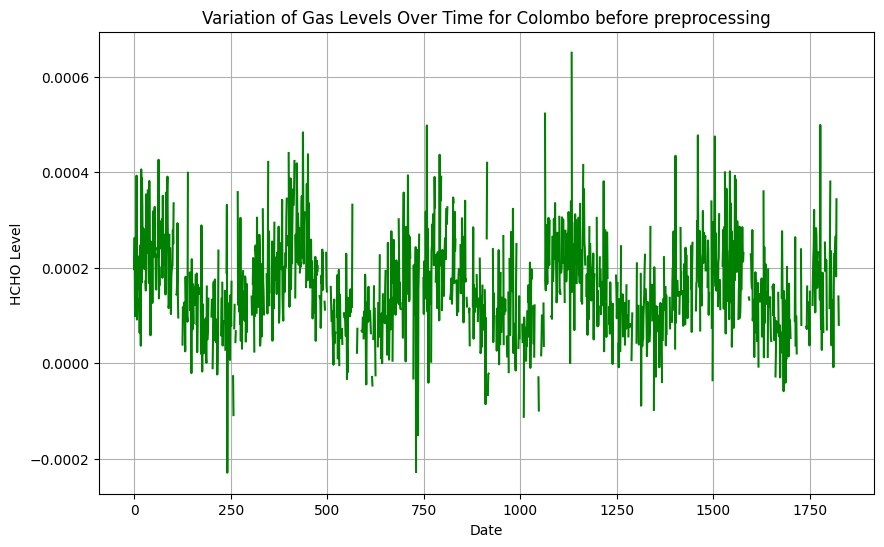

In [42]:
# Before filling in the data

colombo_data.set_index('Date')  # Set 'Start Date' as the index

# Plot the variation of gas levels over time
colombo_data['HCHO Level'].plot(figsize=(10, 6), color='green', linestyle='-')

# Customize the plot
plt.title('Variation of Gas Levels Over Time for Colombo before preprocessing')
plt.xlabel('Date')
plt.ylabel('HCHO Level')
plt.grid(True)
plt.show()


### Filling the missing values with the rolling window down method

In [43]:
# Specifing the size of the rolling window
window_size = 3  

# Fill missing values using a rolling-down window method
colombo_data['HCHO Level'] = colombo_data['HCHO Level'].fillna(method='ffill', limit=window_size)

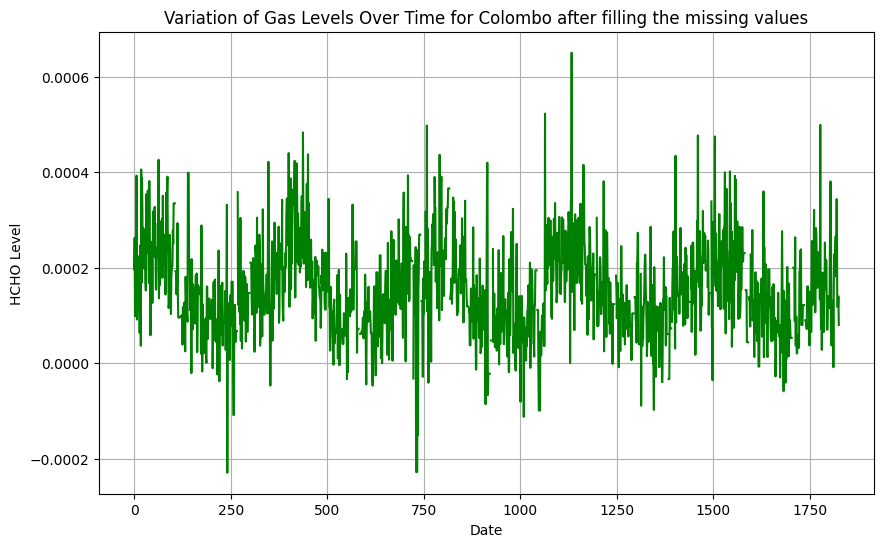

In [44]:
# After filling the data

colombo_data.set_index('Date')  # Set 'Start Date' as the index

# Plot the variation of gas levels over time
colombo_data['HCHO Level'].plot(figsize=(10, 6), color='green', linestyle='-')

# Customize the plot
plt.title('Variation of Gas Levels Over Time for Colombo after filling the missing values')
plt.xlabel('Date')
plt.ylabel('HCHO Level')
plt.grid(True)
plt.show()

In [45]:
# Check for missing values in a specific columns
if colombo_data['HCHO Level'].isna().any():
    print("There are missing values in the HCHO Level column.")
    print("No of missing values: ",colombo_data['HCHO Level'].isna().sum())
else:
    print("There are no missing values in the HCHO Level column.")

There are missing values in the HCHO Level column.
No of missing values:  45


In [46]:
# Checking the data type for the Colombo table
colombo_data.dtypes

HCHO Level                  float64
Location                     object
Date                 datetime64[ns]
Urban Population              int32
Average Elevation             int32
dtype: object

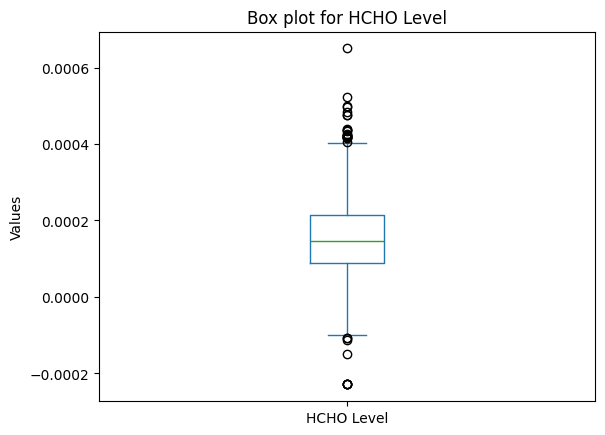

In [47]:
# Box Plot for HCHO level before handling the outliers

# HCHO column
column_to_plot = 'HCHO Level'

colombo_data[column_to_plot].plot(kind='box')

# Title and labels
plt.title('Box plot for HCHO Level')
plt.ylabel('Values')

# Display the plot
plt.show()

### Calculates and presenting relevant statistics

In [48]:
statistics = colombo_data.describe().T
statistics

count                 mean                  min  \
HCHO Level         1781.0             0.000155            -0.000229   
Date                 1826  2021-07-01 12:00:00  2019-01-01 00:00:00   
Urban Population   1826.0            5600000.0            5600000.0   
Average Elevation  1826.0                  5.0                  5.0   

                                   25%                  50%  \
HCHO Level                    0.000089             0.000145   
Date               2020-04-01 06:00:00  2021-07-01 12:00:00   
Urban Population             5600000.0            5600000.0   
Average Elevation                  5.0                  5.0   

                                   75%                  max     std  
HCHO Level                    0.000215              0.00065  0.0001  
Date               2022-09-30 18:00:00  2023-12-31 00:00:00     NaN  
Urban Population             5600000.0            5600000.0     0.0  
Average Elevation                  5.0                  5.0     0.0

### Capping the outliers

In [49]:
# Getting the upper bound and lower bound for the selected region

# Calculate the interquartile range (IQR)
Q1 = colombo_data['HCHO Level'].quantile(0.25)
Q3 = colombo_data['HCHO Level'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [50]:
# Cap outliers
colombo_data['HCHO Level'] = colombo_data['HCHO Level'].clip(lower=lower_bound, upper=upper_bound)

# Display the data frame after capping outliers
colombo_data

HCHO Level        Location       Date  Urban Population  \
0       0.000197  Colombo Proper 2019-01-01           5600000   
1       0.000263  Colombo Proper 2019-01-02           5600000   
2       0.000099  Colombo Proper 2019-01-03           5600000   
3       0.000210  Colombo Proper 2019-01-04           5600000   
4       0.000179  Colombo Proper 2019-01-05           5600000   
...          ...             ...        ...               ...   
1821    0.000118  Colombo Proper 2023-12-27           5600000   
1822    0.000118  Colombo Proper 2023-12-28           5600000   
1823    0.000118  Colombo Proper 2023-12-29           5600000   
1824    0.000140  Colombo Proper 2023-12-30           5600000   
1825    0.000080  Colombo Proper 2023-12-31           5600000   

      Average Elevation  
0                     5  
1                     5  
2                     5  
3                     5  
4                     5  
...                 ...  
1821                  5  
1822                  5  
1823                  5  
1824                  5  
1825                  5  

[1826 rows x 5 columns]

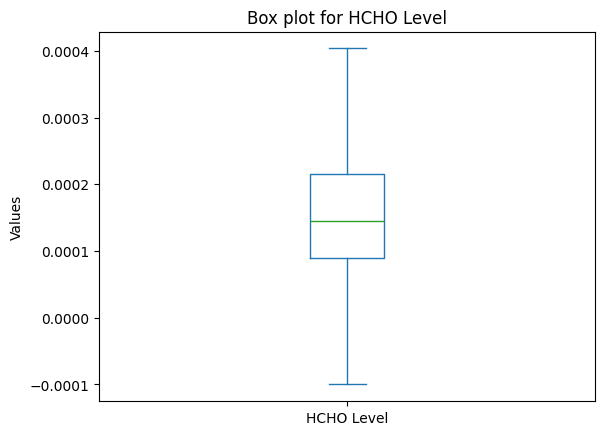

In [51]:
# Box Plot for HCHO level after handling the outliers

# HCHO column
column_to_plot = 'HCHO Level'

colombo_data[column_to_plot].plot(kind='box')

# Title and labels
plt.title('Box plot for HCHO Level')
plt.ylabel('Values')

# Display the plot
plt.show()

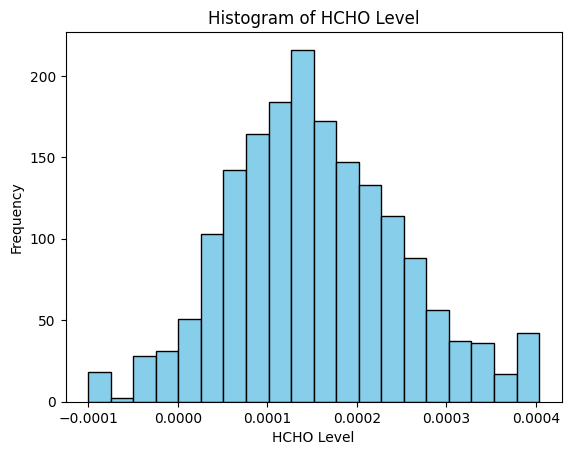

In [52]:
# Plot histogram for 'HCHO Level' column
colombo_data['HCHO Level'].plot(kind='hist', bins=20, edgecolor='black', color='skyblue')

# Title and labels
plt.title('Histogram of HCHO Level')
plt.xlabel('HCHO Level')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

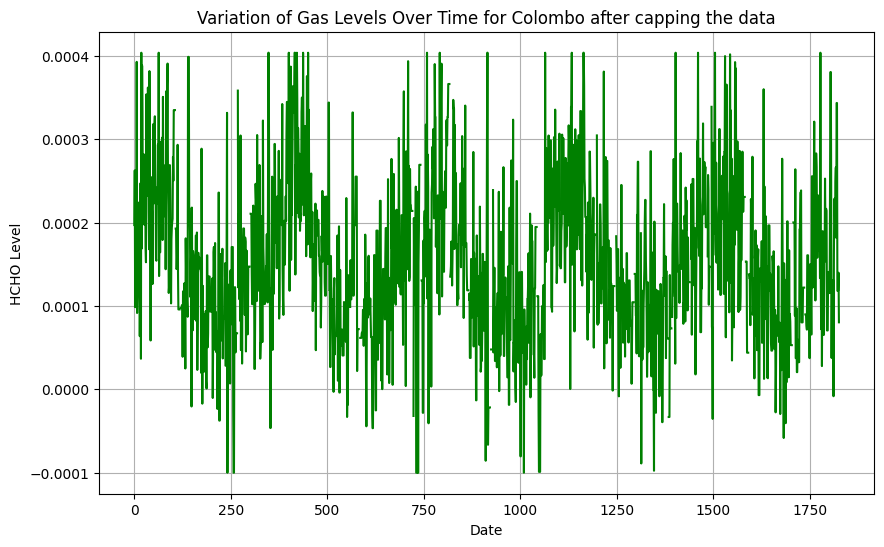

In [53]:
# After capping the data

colombo_data.set_index('Date')  # Set 'Start Date' as the index

# Plot the variation of gas levels over time
colombo_data['HCHO Level'].plot(figsize=(10, 6), color='green', linestyle='-')

# Customize the plot
plt.title('Variation of Gas Levels Over Time for Colombo after capping the data')
plt.xlabel('Date')
plt.ylabel('HCHO Level')
plt.grid(True)
plt.show()


# For Deniyaya - Matara

In [54]:
# Printing the Deniyaya Matara table
deniyaya_matara_data

HCHO Level          Location        Date  Urban Population  \
1826         NaN  Deniyaya, Matara  2019-01-01             45684   
1827    0.000006  Deniyaya, Matara  2019-01-02             45684   
1828    0.000236  Deniyaya, Matara  2019-01-03             45684   
1829    0.000064  Deniyaya, Matara  2019-01-04             45684   
1830    0.000053  Deniyaya, Matara  2019-01-05             45684   
...          ...               ...         ...               ...   
3647    0.000228  Deniyaya, Matara  2023-12-27             45684   
3648         NaN  Deniyaya, Matara  2023-12-28             45684   
3649         NaN  Deniyaya, Matara  2023-12-29             45684   
3650    0.000116  Deniyaya, Matara  2023-12-30             45684   
3651         NaN  Deniyaya, Matara  2023-12-31             45684   

      Average Elevation  
1826                  7  
1827                  7  
1828                  7  
1829                  7  
1830                  7  
...                 ...  
3647                  7  
3648                  7  
3649                  7  
3650                  7  
3651                  7  

[1826 rows x 5 columns]

In [55]:
# Checking if there are any missing dates in Deniyaya - Matara district
deniyaya_matara_data['Date'] = pd.to_datetime(deniyaya_matara_data['Date'])

# Get the minimum and maximum dates in the dataset
min_date = deniyaya_matara_data['Date'].min()
max_date = deniyaya_matara_data['Date'].max()

# Generate a sequence of dates between the minimum and maximum dates
date_range = pd.date_range(start=min_date, end=max_date)

# Check for missing start dates
missing_start_dates = date_range[~date_range.isin(deniyaya_matara_data['Date'])]

if len(missing_start_dates) == 0:
    print("No missing start dates found.")
else:
    print("Missing start dates found:")
    print(missing_start_dates)


No missing start dates found.


In [56]:
# Check for missing values in a Deniyaya Matara dataset
if deniyaya_matara_data['HCHO Level'].isna().any():
    print("There are missing values in the HCHO Level column.")
    print("No of missing values: ",deniyaya_matara_data['HCHO Level'].isna().sum())
else:
    print("There are no missing values in the HCHO Level column.")

There are missing values in the HCHO Level column.
No of missing values:  847


In [57]:
# Checking the data type for the Colombo table
deniyaya_matara_data.dtypes

HCHO Level                  float64
Location                     object
Date                 datetime64[ns]
Urban Population              int32
Average Elevation             int32
dtype: object

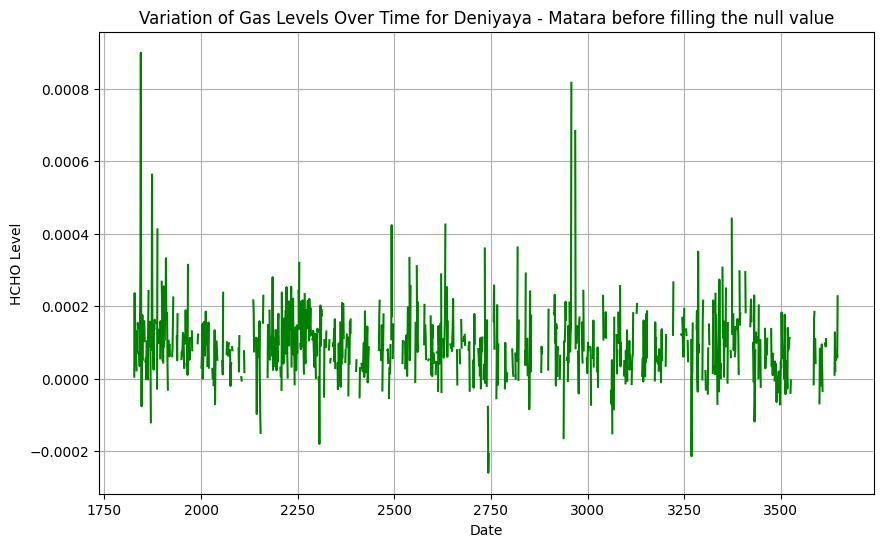

In [58]:
# Plotting the HCHO level vs Dates
deniyaya_matara_data.set_index('Date')  # Set 'Start Date' as the index

# Plot the variation of gas levels over time
deniyaya_matara_data['HCHO Level'].plot(figsize=(10, 6), color='green', linestyle='-')

# Customize the plot
plt.title('Variation of Gas Levels Over Time for Deniyaya - Matara before filling the null value')
plt.xlabel('Date')
plt.ylabel('HCHO Level')
plt.grid(True)
plt.show()

### Filling the missing values with the rolling window down method

In [59]:
# Specifing the size of the rolling window
window_size = 3  

# Fill missing values using a rolling-down window method
deniyaya_matara_data['HCHO Level'] = deniyaya_matara_data['HCHO Level'].fillna(method='ffill', limit=window_size)

In [60]:
# Check for missing values in a Deniyaya - Matara dataset after filling the data
if deniyaya_matara_data['HCHO Level'].isna().any():
    print("There are missing values in the HCHO Level column.")
    print("No of missing values: ",deniyaya_matara_data['HCHO Level'].isna().sum())
else:
    print("There are no missing values in the HCHO Level column.")

There are missing values in the HCHO Level column.
No of missing values:  191


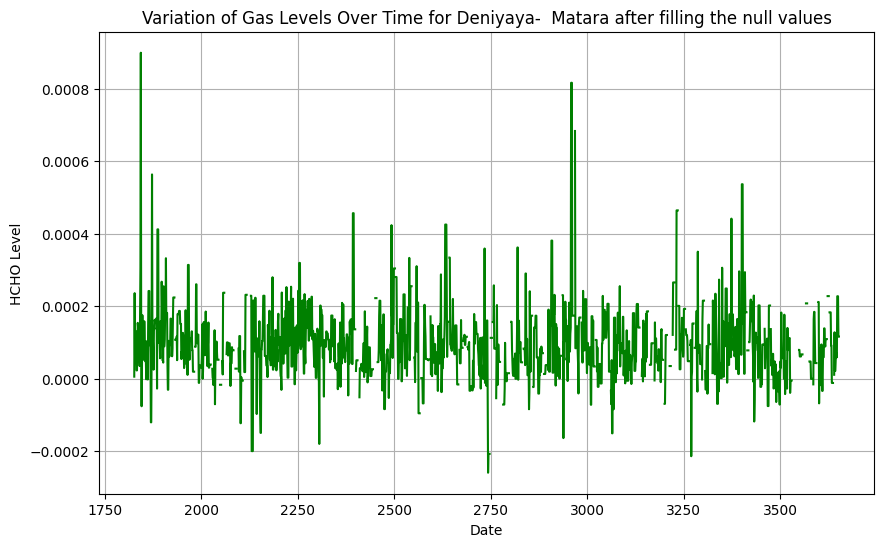

In [61]:
# After filling in the data

deniyaya_matara_data.set_index('Date')  # Set 'Start Date' as the index

# Plot the variation of gas levels over time
deniyaya_matara_data['HCHO Level'].plot(figsize=(10, 6), color='green', linestyle='-')

# Customize the plot
plt.title('Variation of Gas Levels Over Time for Deniyaya-  Matara after filling the null values')
plt.xlabel('Date')
plt.ylabel('HCHO Level')
plt.grid(True)
plt.show()

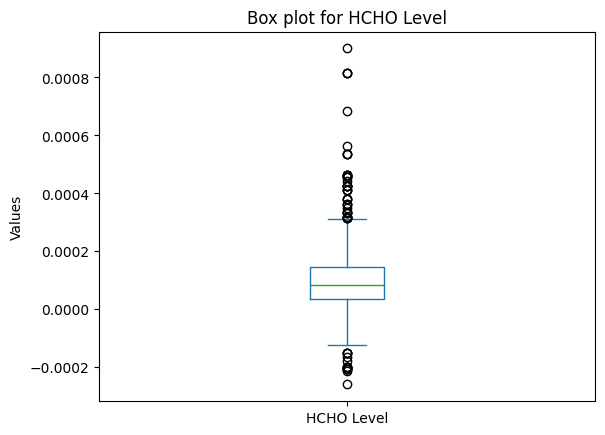

In [62]:
# Box Plot for HCHO level before handling the outliers

# HCHO column
column_to_plot = 'HCHO Level'

deniyaya_matara_data[column_to_plot].plot(kind='box')

# Title and labels
plt.title('Box plot for HCHO Level')
plt.ylabel('Values')

# Display the plot
plt.show()

### Capping the outliers

In [63]:
# Getting the upper bound and lower bound for the selected region

# Calculate the interquartile range (IQR)
Q1 = deniyaya_matara_data['HCHO Level'].quantile(0.25)
Q3 = deniyaya_matara_data['HCHO Level'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [64]:
# Cap outliers
deniyaya_matara_data['HCHO Level'] = deniyaya_matara_data['HCHO Level'].clip(lower=lower_bound, upper=upper_bound)

# Display the DataFrame after capping outliers
deniyaya_matara_data

HCHO Level          Location       Date  Urban Population  \
1826         NaN  Deniyaya, Matara 2019-01-01             45684   
1827    0.000006  Deniyaya, Matara 2019-01-02             45684   
1828    0.000236  Deniyaya, Matara 2019-01-03             45684   
1829    0.000064  Deniyaya, Matara 2019-01-04             45684   
1830    0.000053  Deniyaya, Matara 2019-01-05             45684   
...          ...               ...        ...               ...   
3647    0.000228  Deniyaya, Matara 2023-12-27             45684   
3648    0.000228  Deniyaya, Matara 2023-12-28             45684   
3649    0.000228  Deniyaya, Matara 2023-12-29             45684   
3650    0.000116  Deniyaya, Matara 2023-12-30             45684   
3651    0.000116  Deniyaya, Matara 2023-12-31             45684   

      Average Elevation  
1826                  7  
1827                  7  
1828                  7  
1829                  7  
1830                  7  
...                 ...  
3647                  7  
3648                  7  
3649                  7  
3650                  7  
3651                  7  

[1826 rows x 5 columns]

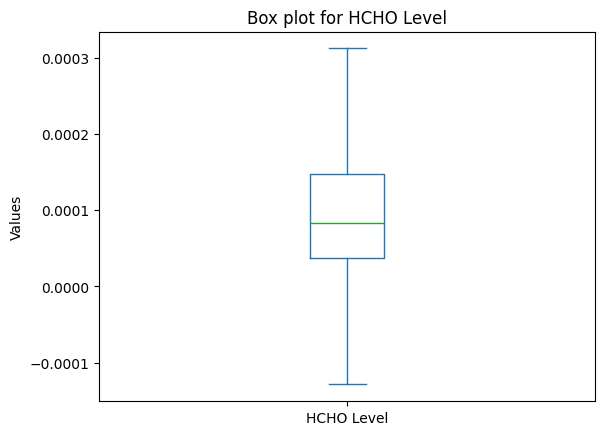

In [65]:
# Box Plot for HCHO level after handling the outliers

# HCHO column
column_to_plot = 'HCHO Level'

deniyaya_matara_data[column_to_plot].plot(kind='box')

# Title and labels
plt.title('Box plot for HCHO Level')
plt.ylabel('Values')

# Display the plot
plt.show()

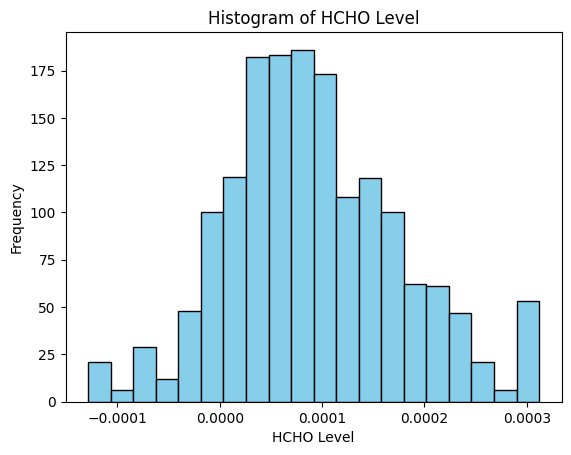

In [66]:
# Plot histogram for 'HCHO Level' column
deniyaya_matara_data['HCHO Level'].plot(kind='hist', bins=20, edgecolor='black', color='skyblue')

# Title and labels
plt.title('Histogram of HCHO Level')
plt.xlabel('HCHO Level')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

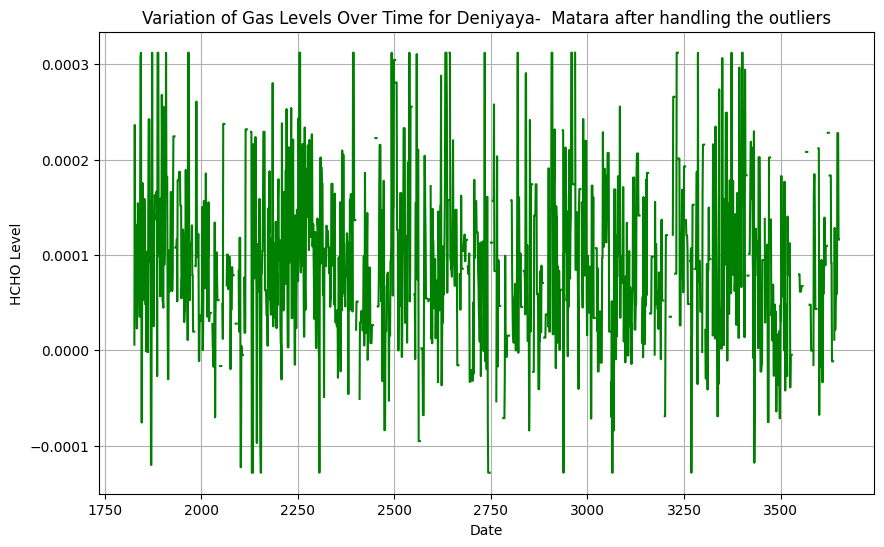

In [67]:
# After handling the outliers in the data

deniyaya_matara_data.set_index('Date')  # Set 'Start Date' as the index

# Plot the variation of gas levels over time
deniyaya_matara_data['HCHO Level'].plot(figsize=(10, 6), color='green', linestyle='-')

# Customize the plot
plt.title('Variation of Gas Levels Over Time for Deniyaya - Matara after handling the outliers')
plt.xlabel('Date')
plt.ylabel('HCHO Level')
plt.grid(True)
plt.show()

# For Nuwara Eliya

In [68]:
# Printing the Colombo table
nuwara_eliya_data

HCHO Level             Location        Date  Urban Population  \
3652         NaN  Nuwara Eliya Proper  2019-01-01             48615   
3653         NaN  Nuwara Eliya Proper  2019-01-02             48615   
3654    0.000191  Nuwara Eliya Proper  2019-01-03             48615   
3655    0.000051  Nuwara Eliya Proper  2019-01-04             48615   
3656    0.000065  Nuwara Eliya Proper  2019-01-05             48615   
...          ...                  ...         ...               ...   
5473         NaN  Nuwara Eliya Proper  2023-12-27             48615   
5474         NaN  Nuwara Eliya Proper  2023-12-28             48615   
5475         NaN  Nuwara Eliya Proper  2023-12-29             48615   
5476         NaN  Nuwara Eliya Proper  2023-12-30             48615   
5477         NaN  Nuwara Eliya Proper  2023-12-31             48615   

      Average Elevation  
3652               1426  
3653               1426  
3654               1426  
3655               1426  
3656               1426  
...                 ...  
5473               1426  
5474               1426  
5475               1426  
5476               1426  
5477               1426  

[1826 rows x 5 columns]

In [69]:
# Checking if there are any missing dates in the Colombo district
nuwara_eliya_data['Date'] = pd.to_datetime(nuwara_eliya_data['Date'])

# Get the minimum and maximum dates in the dataset
min_date = nuwara_eliya_data['Date'].min()
max_date = nuwara_eliya_data['Date'].max()

# Generate a sequence of dates between the minimum and maximum dates
date_range = pd.date_range(start=min_date, end=max_date)

# Check for missing start dates
missing_start_dates = date_range[~date_range.isin(nuwara_eliya_data['Date'])]

if len(missing_start_dates) == 0:
    print("No missing start dates found.")
else:
    print("Missing start dates found:")
    print(missing_start_dates)

No missing start dates found.


In [70]:
# Check for missing values in a Nuwara Eliya dataset
if nuwara_eliya_data['HCHO Level'].isna().any():
    print("There are missing values in the HCHO Level column.")
    print("No of missing values: ", nuwara_eliya_data['HCHO Level'].isna().sum())
else:
    print("There are no missing values in the HCHO Level column.")

There are missing values in the HCHO Level column.
No of missing values:  1085


In [71]:
# Checking the data type for the Colombo table
nuwara_eliya_data.dtypes

HCHO Level                  float64
Location                     object
Date                 datetime64[ns]
Urban Population              int32
Average Elevation             int32
dtype: object

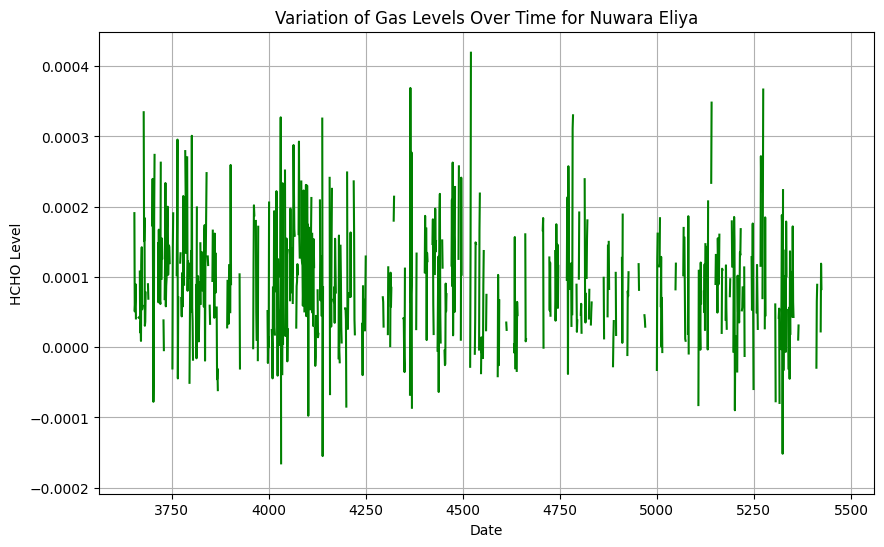

In [72]:
# Before filling in the data

nuwara_eliya_data.set_index('Date')  # Set 'Start Date' as the index

# Plot the variation of gas levels over time
nuwara_eliya_data['HCHO Level'].plot(figsize=(10, 6), color='green', linestyle='-')

# Customize the plot
plt.title('Variation of Gas Levels Over Time for Nuwara Eliya before filling the missing values')
plt.xlabel('Date')
plt.ylabel('HCHO Level')
plt.grid(True)
plt.show()


### Filling the missing values with the rolling window down method

In [73]:
# Specifing the size of the rolling window
window_size = 3  

# Fill missing values using a rolling-down window method
nuwara_eliya_data['HCHO Level'] = nuwara_eliya_data['HCHO Level'].fillna(method='ffill', limit=window_size)

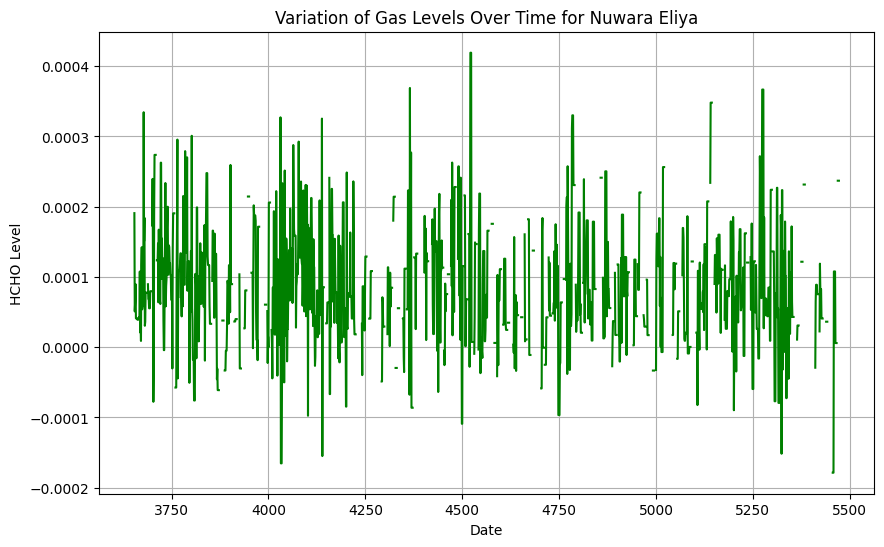

In [74]:
# After filling the data

nuwara_eliya_data.set_index('Date')  # Set 'Start Date' as the index

# Plot the variation of gas levels over time
nuwara_eliya_data['HCHO Level'].plot(figsize=(10, 6), color='green', linestyle='-')

# Customize the plot
plt.title('Variation of Gas Levels Over Time for Nuwara Eliya after filling the missing values')
plt.xlabel('Date')
plt.ylabel('HCHO Level')
plt.grid(True)
plt.show()

In [75]:
# Check for missing values in a specific columns after filling the missing values
if nuwara_eliya_data['HCHO Level'].isna().any():
    print("There are missing values in the HCHO Level column.")
    print("No of missing values: ",nuwara_eliya_data['HCHO Level'].isna().sum())
else:
    print("There are no missing values in the HCHO Level column.")

There are missing values in the HCHO Level column.
No of missing values:  467


In [76]:
# Checking the data type for the Colombo table
nuwara_eliya_data.dtypes

HCHO Level                  float64
Location                     object
Date                 datetime64[ns]
Urban Population              int32
Average Elevation             int32
dtype: object

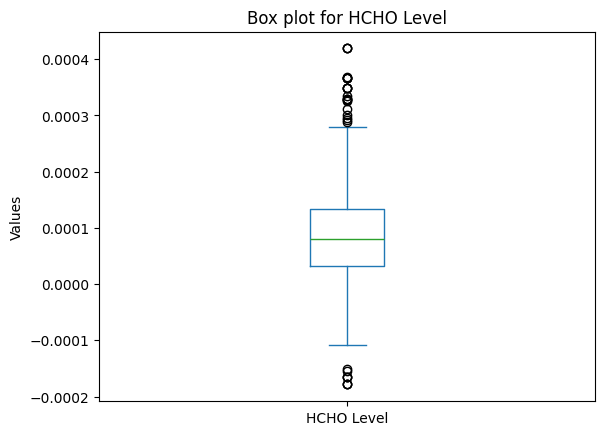

In [77]:
# Box Plot for HCHO level before handling the outliers

# HCHO column
column_to_plot = 'HCHO Level'

nuwara_eliya_data[column_to_plot].plot(kind='box')

# Title and labels
plt.title('Box plot for HCHO Level')
plt.ylabel('Values')

# Display the plot
plt.show()

In [78]:
### Calculates and presenting relevant statistics

In [79]:
statistics = nuwara_eliya_data.describe().T
statistics

count                 mean                  min  \
HCHO Level         1359.0             0.000087            -0.000179   
Date                 1826  2021-07-01 12:00:00  2019-01-01 00:00:00   
Urban Population   1826.0              48615.0              48615.0   
Average Elevation  1826.0               1426.0               1426.0   

                                   25%                  50%  \
HCHO Level                    0.000032              0.00008   
Date               2020-04-01 06:00:00  2021-07-01 12:00:00   
Urban Population               48615.0              48615.0   
Average Elevation               1426.0               1426.0   

                                   75%                  max       std  
HCHO Level                    0.000133             0.000419  0.000085  
Date               2022-09-30 18:00:00  2023-12-31 00:00:00       NaN  
Urban Population               48615.0              48615.0       0.0  
Average Elevation               1426.0               1426.0       0.0

In [80]:
### Capping the outliers

In [81]:
# Getting the upper bound and lower bound for the selected region

# Calculate the interquartile range (IQR)
Q1 = nuwara_eliya_data['HCHO Level'].quantile(0.25)
Q3 = nuwara_eliya_data['HCHO Level'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [82]:
# Cap outliers
nuwara_eliya_data['HCHO Level'] = nuwara_eliya_data['HCHO Level'].clip(lower=lower_bound, upper=upper_bound)

# Display the DataFrame after capping outliers
nuwara_eliya_data

HCHO Level             Location       Date  Urban Population  \
3652         NaN  Nuwara Eliya Proper 2019-01-01             48615   
3653         NaN  Nuwara Eliya Proper 2019-01-02             48615   
3654    0.000191  Nuwara Eliya Proper 2019-01-03             48615   
3655    0.000051  Nuwara Eliya Proper 2019-01-04             48615   
3656    0.000065  Nuwara Eliya Proper 2019-01-05             48615   
...          ...                  ...        ...               ...   
5473         NaN  Nuwara Eliya Proper 2023-12-27             48615   
5474         NaN  Nuwara Eliya Proper 2023-12-28             48615   
5475         NaN  Nuwara Eliya Proper 2023-12-29             48615   
5476         NaN  Nuwara Eliya Proper 2023-12-30             48615   
5477         NaN  Nuwara Eliya Proper 2023-12-31             48615   

      Average Elevation  
3652               1426  
3653               1426  
3654               1426  
3655               1426  
3656               1426  
...                 ...  
5473               1426  
5474               1426  
5475               1426  
5476               1426  
5477               1426  

[1826 rows x 5 columns]

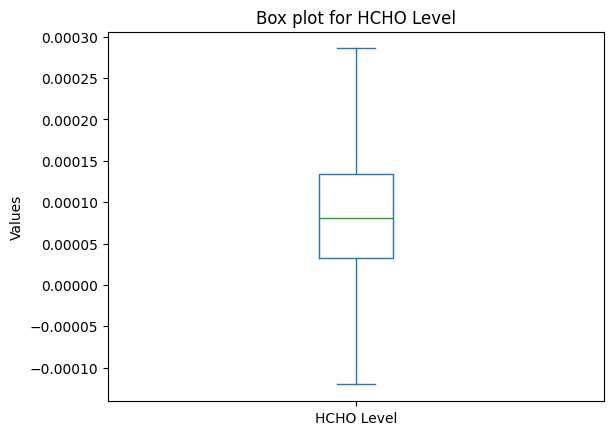

In [83]:
# Box Plot for HCHO level after handling the outliers

# HCHO column
column_to_plot = 'HCHO Level'

nuwara_eliya_data[column_to_plot].plot(kind='box')

# Title and labels
plt.title('Box plot for HCHO Level')
plt.ylabel('Values')

# Display the plot
plt.show()

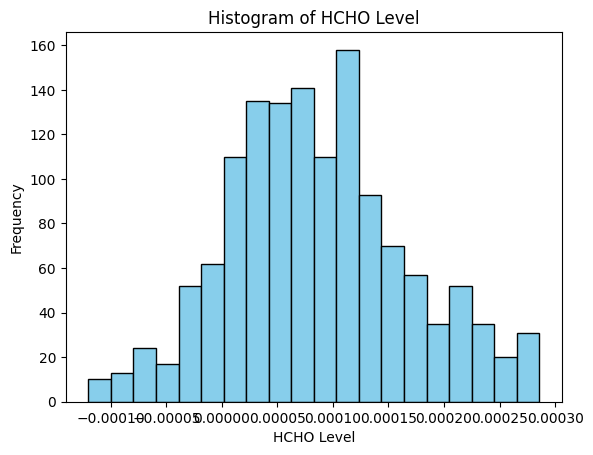

In [84]:
# Plot histogram for 'HCHO Level' column
nuwara_eliya_data['HCHO Level'].plot(kind='hist', bins=20, edgecolor='black', color='skyblue')

# Title and labels
plt.title('Histogram of HCHO Level')
plt.xlabel('HCHO Level')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

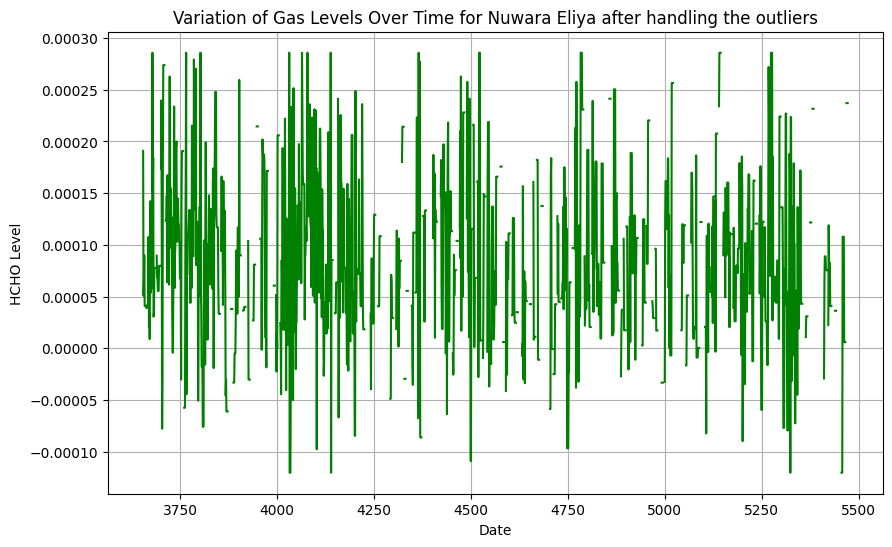

In [114]:
# After handling the outliers

nuwara_eliya_data.set_index('Date')  # Set 'Start Date' as the index

# Plot the variation of gas levels over time
nuwara_eliya_data['HCHO Level'].plot(figsize=(10, 6), color='green', linestyle='-')

# Customize the plot
plt.title('Variation of Gas Levels Over Time for Nuwara Eliya after handling the outliers')
plt.xlabel('Date')
plt.ylabel('HCHO Level')
plt.grid(True)
plt.show()

# For Kandy Proper

In [86]:
kandy_data

HCHO Level      Location        Date  Urban Population  \
5478    0.000176  Kandy Proper  2019-01-01            170544   
5479    0.000092  Kandy Proper  2019-01-02            170544   
5480         NaN  Kandy Proper  2019-01-03            170544   
5481    0.000191  Kandy Proper  2019-01-04            170544   
5482    0.000122  Kandy Proper  2019-01-05            170544   
...          ...           ...         ...               ...   
7299         NaN  Kandy Proper  2023-12-27            170544   
7300         NaN  Kandy Proper  2023-12-28            170544   
7301         NaN  Kandy Proper  2023-12-29            170544   
7302    0.000056  Kandy Proper  2023-12-30            170544   
7303         NaN  Kandy Proper  2023-12-31            170544   

      Average Elevation  
5478                621  
5479                621  
5480                621  
5481                621  
5482                621  
...                 ...  
7299                621  
7300                621  
7301                621  
7302                621  
7303                621  

[1826 rows x 5 columns]

In [87]:
# Checking if there are any missing dates in the Kandy district
kandy_data['Date'] = pd.to_datetime(kandy_data['Date'])

# Get the minimum and maximum dates in the dataset
min_date = kandy_data['Date'].min()
max_date = kandy_data['Date'].max()

# Generate a sequence of dates between the minimum and maximum dates
date_range = pd.date_range(start=min_date, end=max_date)

# Check for missing start dates
missing_start_dates = date_range[~date_range.isin(kandy_data['Date'])]

if len(missing_start_dates) == 0:
    print("No missing start dates found.")
else:
    print("Missing start dates found:")
    print(missing_start_dates)

No missing start dates found.


In [88]:
# Check for missing values in a Kandy dataset
if kandy_data['HCHO Level'].isna().any():
    print("There are missing values in the HCHO Level column.")
    print("No of missing values: ",kandy_data['HCHO Level'].isna().sum())
else:
    print("There are no missing values in the HCHO Level column.")

There are missing values in the HCHO Level column.
No of missing values:  793


In [89]:
# Checking the data type for the Kandy table
kandy_data

HCHO Level      Location       Date  Urban Population  Average Elevation
5478    0.000176  Kandy Proper 2019-01-01            170544                621
5479    0.000092  Kandy Proper 2019-01-02            170544                621
5480         NaN  Kandy Proper 2019-01-03            170544                621
5481    0.000191  Kandy Proper 2019-01-04            170544                621
5482    0.000122  Kandy Proper 2019-01-05            170544                621
...          ...           ...        ...               ...                ...
7299         NaN  Kandy Proper 2023-12-27            170544                621
7300         NaN  Kandy Proper 2023-12-28            170544                621
7301         NaN  Kandy Proper 2023-12-29            170544                621
7302    0.000056  Kandy Proper 2023-12-30            170544                621
7303         NaN  Kandy Proper 2023-12-31            170544                621

[1826 rows x 5 columns]

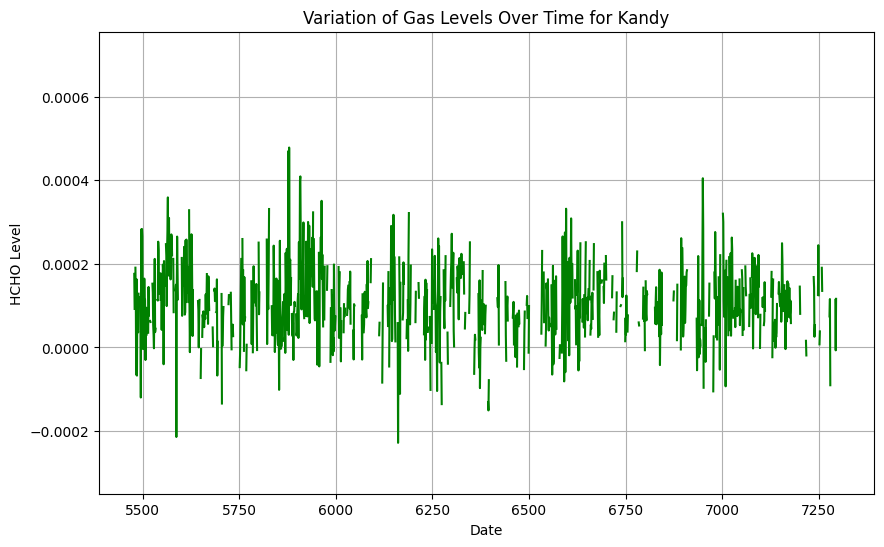

In [90]:
# Before filling in the data

kandy_data.set_index('Date')  # Set 'Start Date' as the index

# Plot the variation of gas levels over time
kandy_data['HCHO Level'].plot(figsize=(10, 6), color='green', linestyle='-')

# Customize the plot
plt.title('Variation of Gas Levels Over Time for Kandy before filling the null values')
plt.xlabel('Date')
plt.ylabel('HCHO Level')
plt.grid(True)
plt.show()


### Filling the missing values with the rolling window down method

In [91]:
# Specifing the size of the rolling window
window_size = 3  

# Fill missing values using a rolling-down window method
kandy_data['HCHO Level'] = kandy_data['HCHO Level'].fillna(method='ffill', limit=window_size)

In [92]:
# Check for missing values in a specific columns
if kandy_data['HCHO Level'].isna().any():
    print("There are missing values in the HCHO Level column.")
    print("No of missing values: ",colombo_data['HCHO Level'].isna().sum())
else:
    print("There are no missing values in the HCHO Level column.")

There are missing values in the HCHO Level column.
No of missing values:  45


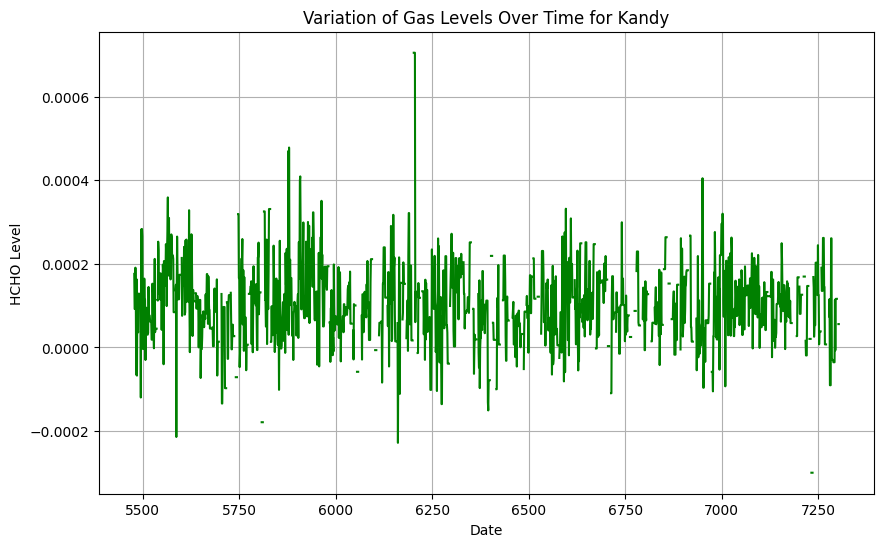

In [93]:
# After filling the data

kandy_data.set_index('Date')  # Set 'Start Date' as the index

# Plot the variation of gas levels over time
kandy_data['HCHO Level'].plot(figsize=(10, 6), color='green', linestyle='-')

# Customize the plot
plt.title('Variation of Gas Levels Over Time for Kandy after filling the null values')
plt.xlabel('Date')
plt.ylabel('HCHO Level')
plt.grid(True)
plt.show()

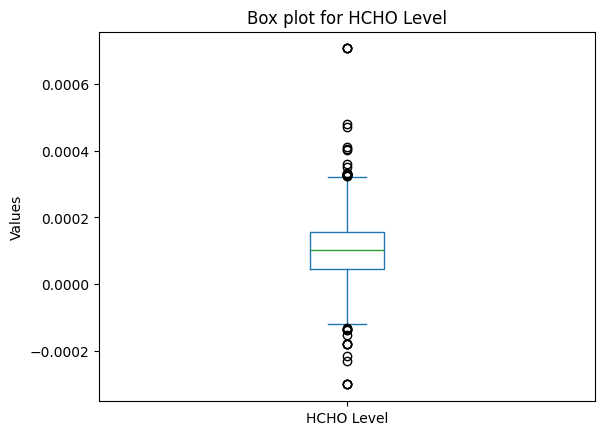

In [94]:
# Box Plot for HCHO level before handling the outliers

# HCHO column
column_to_plot = 'HCHO Level'

kandy_data[column_to_plot].plot(kind='box')

# Title and labels
plt.title('Box plot for HCHO Level')
plt.ylabel('Values')

# Display the plot
plt.show()

### Calculates and presenting relevant statistics

In [95]:
statistics = kandy_data.describe().T
statistics

count                 mean                  min  \
HCHO Level         1593.0             0.000103              -0.0003   
Date                 1826  2021-07-01 12:00:00  2019-01-01 00:00:00   
Urban Population   1826.0             170544.0             170544.0   
Average Elevation  1826.0                621.0                621.0   

                                   25%                  50%  \
HCHO Level                    0.000045             0.000101   
Date               2020-04-01 06:00:00  2021-07-01 12:00:00   
Urban Population              170544.0             170544.0   
Average Elevation                621.0                621.0   

                                   75%                  max       std  
HCHO Level                    0.000156             0.000705  0.000095  
Date               2022-09-30 18:00:00  2023-12-31 00:00:00       NaN  
Urban Population              170544.0             170544.0       0.0  
Average Elevation                621.0                621.0       0.0

### Capping the outliers

In [96]:
# Getting the upper bound and lower bound for the selected region

# Calculate the interquartile range (IQR)
Q1 = kandy_data['HCHO Level'].quantile(0.25)
Q3 = kandy_data['HCHO Level'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [97]:
# Cap outliers
kandy_data['HCHO Level'] = kandy_data['HCHO Level'].clip(lower=lower_bound, upper=upper_bound)

# Display the DataFrame after capping outliers
kandy_data

HCHO Level      Location       Date  Urban Population  Average Elevation
5478    0.000176  Kandy Proper 2019-01-01            170544                621
5479    0.000092  Kandy Proper 2019-01-02            170544                621
5480    0.000092  Kandy Proper 2019-01-03            170544                621
5481    0.000191  Kandy Proper 2019-01-04            170544                621
5482    0.000122  Kandy Proper 2019-01-05            170544                621
...          ...           ...        ...               ...                ...
7299         NaN  Kandy Proper 2023-12-27            170544                621
7300         NaN  Kandy Proper 2023-12-28            170544                621
7301         NaN  Kandy Proper 2023-12-29            170544                621
7302    0.000056  Kandy Proper 2023-12-30            170544                621
7303    0.000056  Kandy Proper 2023-12-31            170544                621

[1826 rows x 5 columns]

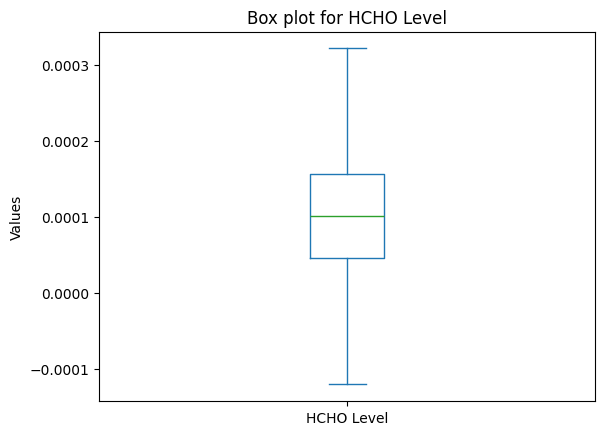

In [98]:
# Box Plot for HCHO level after handling the outliers

# HCHO column
column_to_plot = 'HCHO Level'

kandy_data[column_to_plot].plot(kind='box')

# Title and labels
plt.title('Box plot for HCHO Level')
plt.ylabel('Values')

# Display the plot
plt.show()

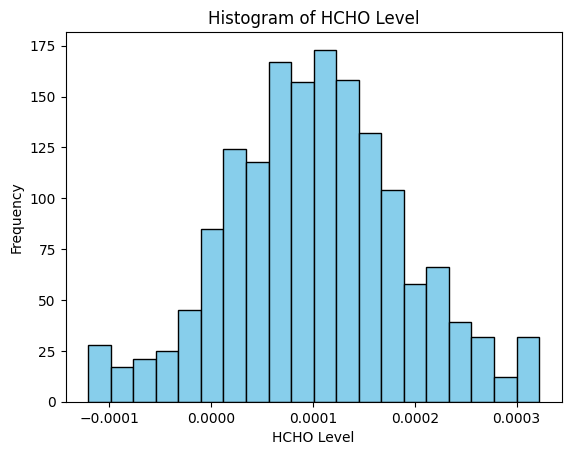

In [99]:
# Plot histogram for 'HCHO Level' column
kandy_data['HCHO Level'].plot(kind='hist', bins=20, edgecolor='black', color='skyblue')

# Title and labels
plt.title('Histogram of HCHO Level')
plt.xlabel('HCHO Level')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

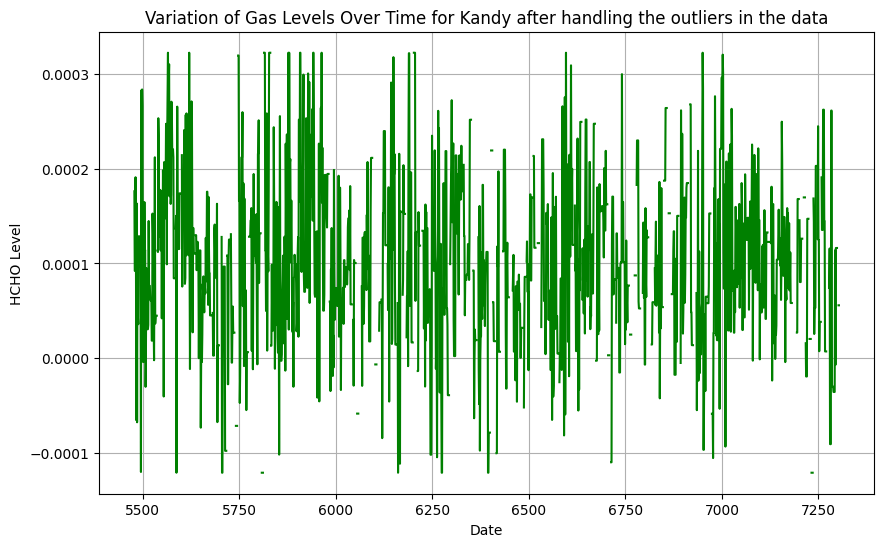

In [115]:
# After handling the outliers in the data

kandy_data.set_index('Date')  # Set 'Start Date' as the index

# Plot the variation of gas levels over time
kandy_data['HCHO Level'].plot(figsize=(10, 6), color='green', linestyle='-')

# Customize the plot
plt.title('Variation of Gas Levels Over Time for Kandy after handling the outliers in the data')
plt.xlabel('Date')
plt.ylabel('HCHO Level')
plt.grid(True)
plt.show()

# For Bibile Monaragala Data

In [100]:
# Printing the Bibile Monaragala data table
bibile_monaragala_data

HCHO Level            Location        Date  Urban Population  \
7304         NaN  Bibile, Monaragala  2019-01-01              1761   
7305    0.000019  Bibile, Monaragala  2019-01-02              1761   
7306    0.000028  Bibile, Monaragala  2019-01-03              1761   
7307    0.000037  Bibile, Monaragala  2019-01-04              1761   
7308   -0.000018  Bibile, Monaragala  2019-01-05              1761   
...          ...                 ...         ...               ...   
9125         NaN  Bibile, Monaragala  2023-12-27              1761   
9126         NaN  Bibile, Monaragala  2023-12-28              1761   
9127         NaN  Bibile, Monaragala  2023-12-29              1761   
9128         NaN  Bibile, Monaragala  2023-12-30              1761   
9129         NaN  Bibile, Monaragala  2023-12-31              1761   

      Average Elevation  
7304                233  
7305                233  
7306                233  
7307                233  
7308                233  
...                 ...  
9125                233  
9126                233  
9127                233  
9128                233  
9129                233  

[1826 rows x 5 columns]

In [101]:
# Checking if there are any missing dates in the Bilible - Monaragala district
bibile_monaragala_data['Date'] = pd.to_datetime(bibile_monaragala_data['Date'])

# Get the minimum and maximum dates in the dataset
min_date = bibile_monaragala_data['Date'].min()
max_date = bibile_monaragala_data['Date'].max()

# Generate a sequence of dates between the minimum and maximum dates
date_range = pd.date_range(start=min_date, end=max_date)

# Check for missing start dates
missing_start_dates = date_range[~date_range.isin(bibile_monaragala_data['Date'])]

if len(missing_start_dates) == 0:
    print("No missing start dates found.")
else:
    print("Missing start dates found:")
    print(missing_start_dates)

No missing start dates found.


In [102]:
# Check for missing values in a colombo dataset
if bibile_monaragala_data['HCHO Level'].isna().any():
    print("There are missing values in the HCHO Level column.")
    print("No of missing values: ", bibile_monaragala_data['HCHO Level'].isna().sum())
else:
    print("There are no missing values in the HCHO Level column.")

There are missing values in the HCHO Level column.
No of missing values:  695


In [103]:
# Checking the data type for the Bibile - Monaaragala table
bibile_monaragala_data.dtypes

HCHO Level                  float64
Location                     object
Date                 datetime64[ns]
Urban Population              int32
Average Elevation             int32
dtype: object

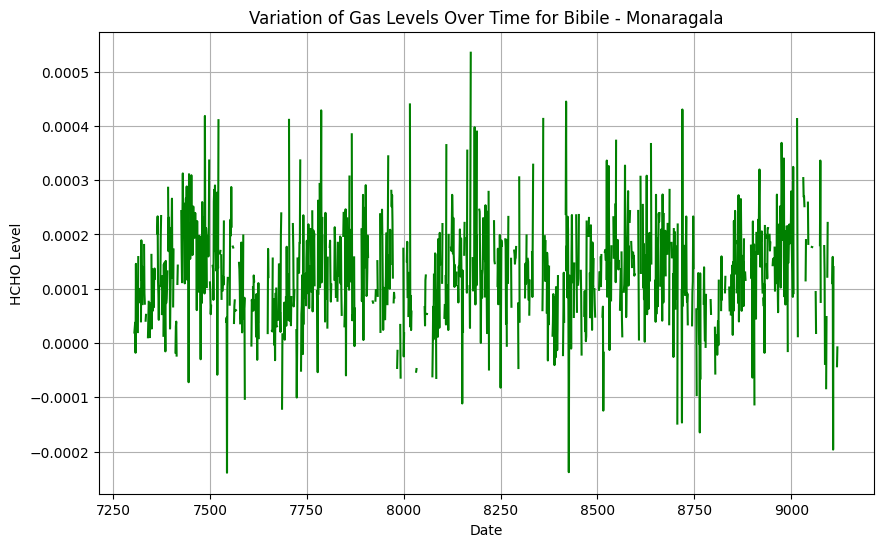

In [104]:
# Before filling in the data

bibile_monaragala_data.set_index('Date')  # Set 'Start Date' as the index

# Plot the variation of gas levels over time
bibile_monaragala_data['HCHO Level'].plot(figsize=(10, 6), color='green', linestyle='-')

# Customize the plot
plt.title('Variation of Gas Levels Over Time for Bibile - Monaragala')
plt.xlabel('Date')
plt.ylabel('HCHO Level')
plt.grid(True)
plt.show()


### Filling the missing values with the rolling window down method

In [105]:
# Specifing the size of the rolling window
window_size = 3  

# Fill missing values using a rolling-down window method
bibile_monaragala_data['HCHO Level'] = bibile_monaragala_data['HCHO Level'].fillna(method='ffill', limit=window_size)

In [106]:
# Check for missing values in a specific columns
if bibile_monaragala_data['HCHO Level'].isna().any():
    print("There are missing values in the HCHO Level column.")
    print("No of missing values: ", bibile_monaragala_data['HCHO Level'].isna().sum())
else:
    print("There are no missing values in the HCHO Level column.")

There are missing values in the HCHO Level column.
No of missing values:  139


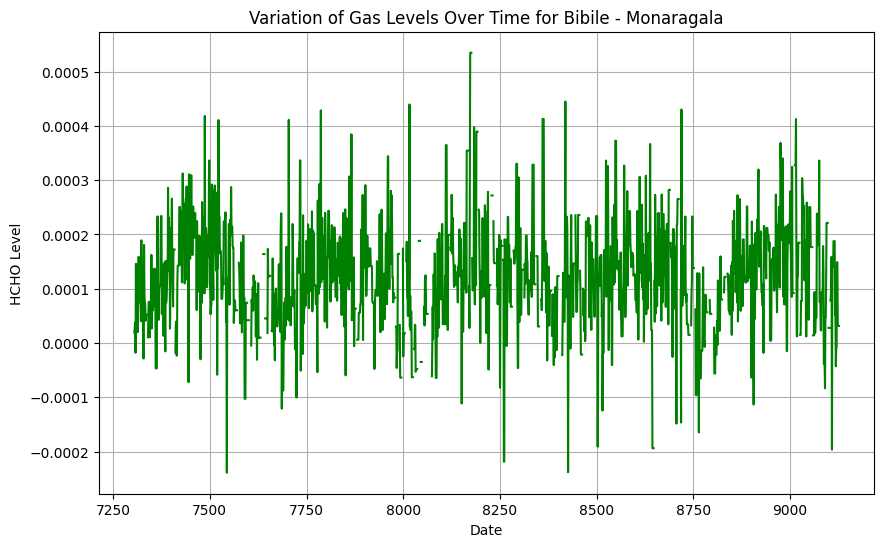

In [107]:
# After filling the data

bibile_monaragala_data.set_index('Date')  # Set 'Start Date' as the index

# Plot the variation of gas levels over time
bibile_monaragala_data['HCHO Level'].plot(figsize=(10, 6), color='green', linestyle='-')

# Customize the plot
plt.title('Variation of Gas Levels Over Time for Bibile - Monaragala')
plt.xlabel('Date')
plt.ylabel('HCHO Level')
plt.grid(True)
plt.show()

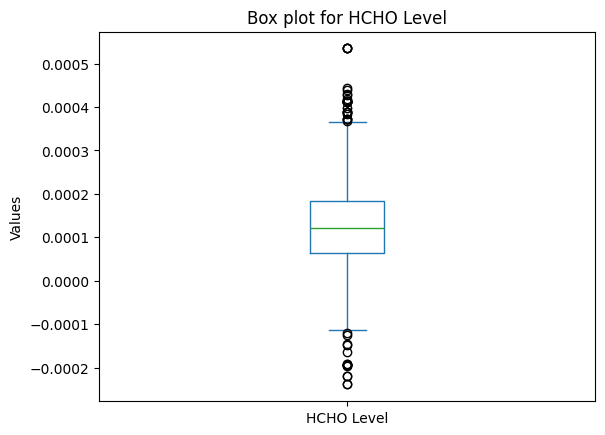

In [108]:
# Box Plot for HCHO level before handling the outliers

# HCHO column
column_to_plot = 'HCHO Level'

bibile_monaragala_data[column_to_plot].plot(kind='box')

# Title and labels
plt.title('Box plot for HCHO Level')
plt.ylabel('Values')

# Display the plot
plt.show()

### Calculates and presenting relevant statistics

In [109]:
statistics = bibile_monaragala_data.describe().T
statistics

count                 mean                  min  \
HCHO Level         1687.0             0.000124            -0.000239   
Date                 1826  2021-07-01 12:00:00  2019-01-01 00:00:00   
Urban Population   1826.0               1761.0               1761.0   
Average Elevation  1826.0                233.0                233.0   

                                   25%                  50%  \
HCHO Level                    0.000063             0.000122   
Date               2020-04-01 06:00:00  2021-07-01 12:00:00   
Urban Population                1761.0               1761.0   
Average Elevation                233.0                233.0   

                                   75%                  max       std  
HCHO Level                    0.000185             0.000535  0.000098  
Date               2022-09-30 18:00:00  2023-12-31 00:00:00       NaN  
Urban Population                1761.0               1761.0       0.0  
Average Elevation                233.0                233.0       0.0

### Capping the outliers

In [110]:
# Getting the upper bound and lower bound for the selected region

# Calculate the interquartile range (IQR)
Q1 = bibile_monaragala_data['HCHO Level'].quantile(0.25)
Q3 = bibile_monaragala_data['HCHO Level'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [111]:
# Cap outliers
bibile_monaragala_data['HCHO Level'] = bibile_monaragala_data['HCHO Level'].clip(lower=lower_bound, upper=upper_bound)

# Display the DataFrame after capping outliers
bibile_monaragala_data

HCHO Level            Location       Date  Urban Population  \
7304         NaN  Bibile, Monaragala 2019-01-01              1761   
7305    0.000019  Bibile, Monaragala 2019-01-02              1761   
7306    0.000028  Bibile, Monaragala 2019-01-03              1761   
7307    0.000037  Bibile, Monaragala 2019-01-04              1761   
7308   -0.000018  Bibile, Monaragala 2019-01-05              1761   
...          ...                 ...        ...               ...   
9125    0.000031  Bibile, Monaragala 2023-12-27              1761   
9126    0.000031  Bibile, Monaragala 2023-12-28              1761   
9127         NaN  Bibile, Monaragala 2023-12-29              1761   
9128         NaN  Bibile, Monaragala 2023-12-30              1761   
9129         NaN  Bibile, Monaragala 2023-12-31              1761   

      Average Elevation  
7304                233  
7305                233  
7306                233  
7307                233  
7308                233  
...                 ...  
9125                233  
9126                233  
9127                233  
9128                233  
9129                233  

[1826 rows x 5 columns]

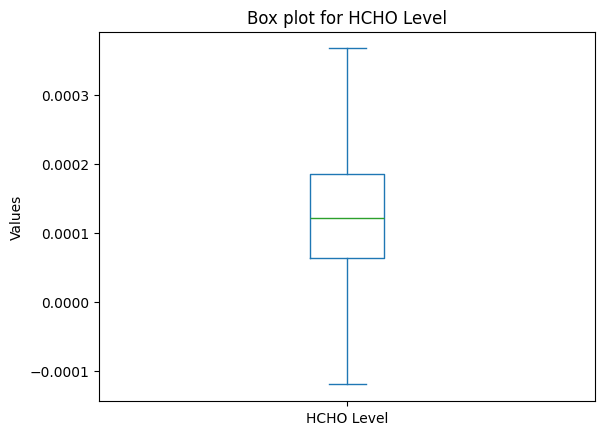

In [112]:
# Box Plot for HCHO level after handling the outliers

# HCHO column
column_to_plot = 'HCHO Level'

bibile_monaragala_data[column_to_plot].plot(kind='box')

# Title and labels
plt.title('Box plot for HCHO Level')
plt.ylabel('Values')

# Display the plot
plt.show()

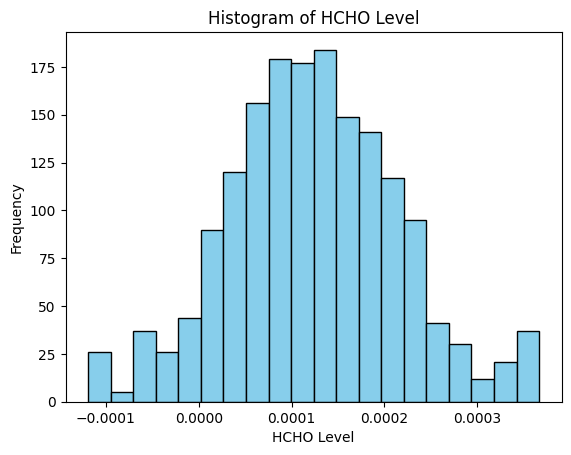

In [113]:
# Plot histogram for 'HCHO Level' column
bibile_monaragala_data['HCHO Level'].plot(kind='hist', bins=20, edgecolor='black', color='skyblue')

# Title and labels
plt.title('Histogram of HCHO Level')
plt.xlabel('HCHO Level')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

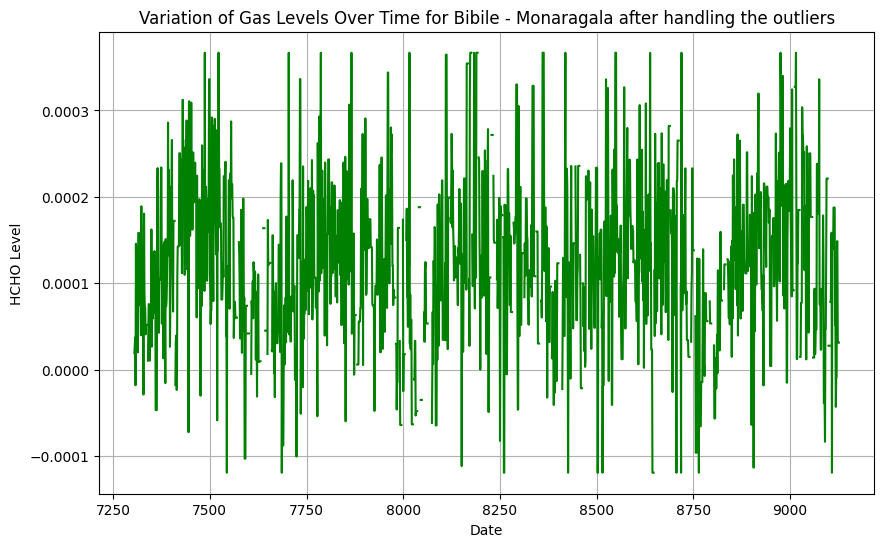

In [117]:
# After handling the outliers in the data

bibile_monaragala_data.set_index('Date')  # Set 'Start Date' as the index

# Plot the variation of gas levels over time
bibile_monaragala_data['HCHO Level'].plot(figsize=(10, 6), color='green', linestyle='-')

# Customize the plot
plt.title('Variation of Gas Levels Over Time for Bibile - Monaragala after handling the outliers')
plt.xlabel('Date')
plt.ylabel('HCHO Level')
plt.grid(True)
plt.show()

# For Kurunegala data

In [118]:
# Printing the Kurunegala table
kurunegala_data

HCHO Level           Location        Date  Urban Population  \
9130     0.000088  Kurunegala Proper  2019-01-01             30000   
9131     0.000137  Kurunegala Proper  2019-01-02             30000   
9132     0.000148  Kurunegala Proper  2019-01-03             30000   
9133    -0.000002  Kurunegala Proper  2019-01-04             30000   
9134     0.000249  Kurunegala Proper  2019-01-05             30000   
...           ...                ...         ...               ...   
10951    0.000075  Kurunegala Proper  2023-12-27             30000   
10952         NaN  Kurunegala Proper  2023-12-28             30000   
10953         NaN  Kurunegala Proper  2023-12-29             30000   
10954    0.000158  Kurunegala Proper  2023-12-30             30000   
10955         NaN  Kurunegala Proper  2023-12-31             30000   

       Average Elevation  
9130                 146  
9131                 146  
9132                 146  
9133                 146  
9134                 146  
...                  ...  
10951                146  
10952                146  
10953                146  
10954                146  
10955                146  

[1826 rows x 5 columns]

In [119]:
# Checking if there are any missing dates in the Kurunegala district
kurunegala_data['Date'] = pd.to_datetime(kurunegala_data['Date'])

# Get the minimum and maximum dates in the dataset
min_date = kurunegala_data['Date'].min()
max_date = kurunegala_data['Date'].max()

# Generate a sequence of dates between the minimum and maximum dates
date_range = pd.date_range(start=min_date, end=max_date)

# Check for missing start dates
missing_start_dates = date_range[~date_range.isin(kurunegala_data['Date'])]

if len(missing_start_dates) == 0:
    print("No missing start dates found.")
else:
    print("Missing start dates found:")
    print(missing_start_dates)

No missing start dates found.


In [120]:
# Check for missing values in a Kurunegala dataset
if kurunegala_data['HCHO Level'].isna().any():
    print("There are missing values in the HCHO Level column.")
    print("No of missing values: ", kurunegala_data['HCHO Level'].isna().sum())
else:
    print("There are no missing values in the HCHO Level column.")

There are missing values in the HCHO Level column.
No of missing values:  592


In [121]:
# Checking the data type for the Kurunegala table
kurunegala_data.dtypes

HCHO Level                  float64
Location                     object
Date                 datetime64[ns]
Urban Population              int32
Average Elevation             int32
dtype: object

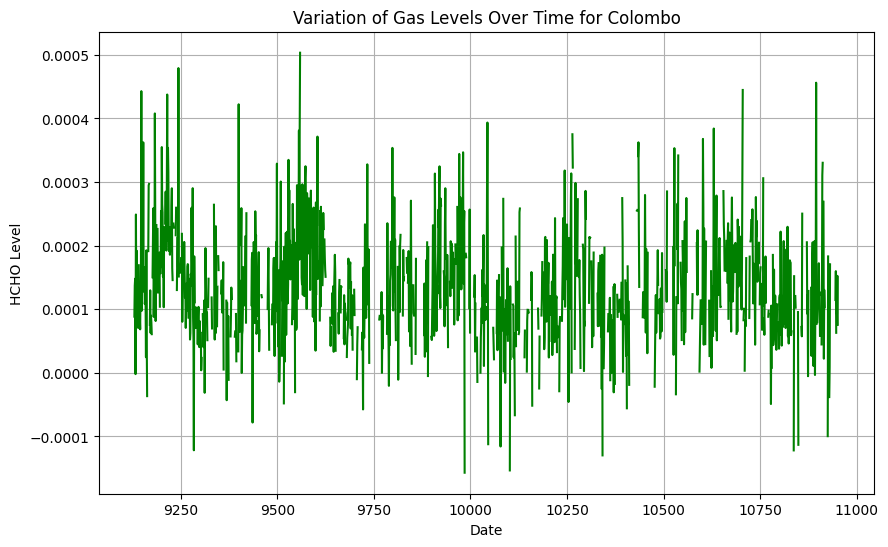

In [122]:
# Before filling in the data

kurunegala_data.set_index('Date')  # Set 'Start Date' as the index

# Plot the variation of gas levels over time
kurunegala_data['HCHO Level'].plot(figsize=(10, 6), color='green', linestyle='-')

# Customize the plot
plt.title('Variation of Gas Levels Over Time for Kurunegala before filling the missing values')
plt.xlabel('Date')
plt.ylabel('HCHO Level')
plt.grid(True)
plt.show()


### Filling the missing values with the rolling window down method

In [123]:
# Specifing the size of the rolling window
window_size = 3  

# Fill missing values using a rolling-down window method
kurunegala_data['HCHO Level'] = kurunegala_data['HCHO Level'].fillna(method='ffill', limit=window_size)

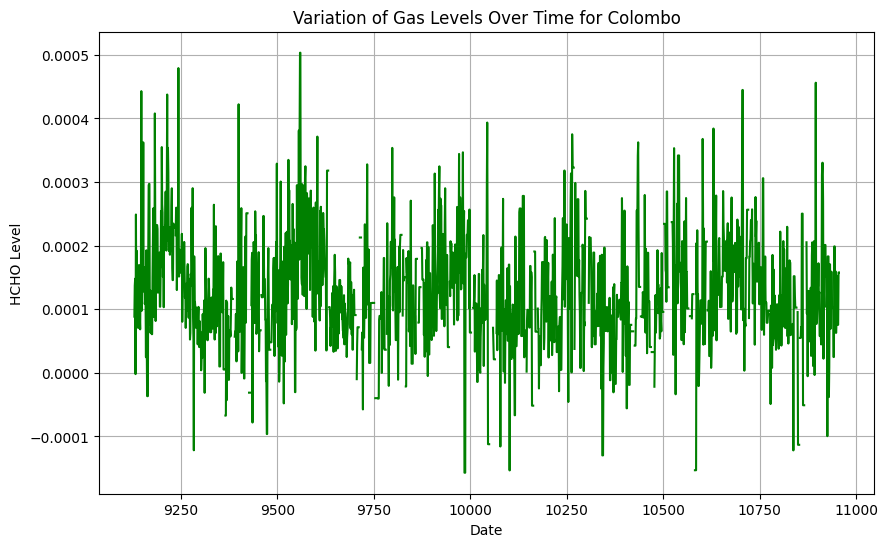

In [124]:
# After filling the data

kurunegala_data.set_index('Date')  # Set 'Start Date' as the index

# Plot the variation of gas levels over time
kurunegala_data['HCHO Level'].plot(figsize=(10, 6), color='green', linestyle='-')

# Customize the plot
plt.title('Variation of Gas Levels Over Time for Kurunegala after missing the values')
plt.xlabel('Date')
plt.ylabel('HCHO Level')
plt.grid(True)
plt.show()

In [125]:
# Check for missing values in a specific columns
if kurunegala_data['HCHO Level'].isna().any():
    print("There are missing values in the HCHO Level column.")
    print("No of missing values: ", kurunegala_data['HCHO Level'].isna().sum())
else:
    print("There are no missing values in the HCHO Level column.")

There are missing values in the HCHO Level column.
No of missing values:  101


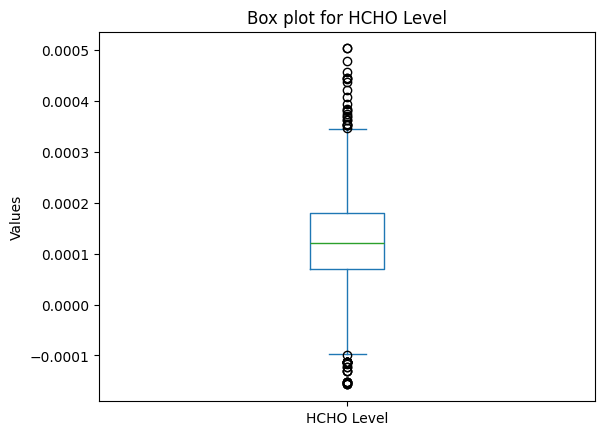

In [126]:
# Box Plot for HCHO level before handling the outliers

# HCHO column
column_to_plot = 'HCHO Level'

kurunegala_data[column_to_plot].plot(kind='box')

# Title and labels
plt.title('Box plot for HCHO Level')
plt.ylabel('Values')

# Display the plot
plt.show()

In [127]:
### Calculates and presenting relevant statistics

In [128]:
statistics = kurunegala_data.describe().T
statistics

count                 mean                  min  \
HCHO Level         1725.0             0.000127            -0.000157   
Date                 1826  2021-07-01 12:00:00  2019-01-01 00:00:00   
Urban Population   1826.0              30000.0              30000.0   
Average Elevation  1826.0                146.0                146.0   

                                   25%                  50%  \
HCHO Level                    0.000069              0.00012   
Date               2020-04-01 06:00:00  2021-07-01 12:00:00   
Urban Population               30000.0              30000.0   
Average Elevation                146.0                146.0   

                                   75%                  max       std  
HCHO Level                     0.00018             0.000503  0.000089  
Date               2022-09-30 18:00:00  2023-12-31 00:00:00       NaN  
Urban Population               30000.0              30000.0       0.0  
Average Elevation                146.0                146.0       0.0

In [129]:
### Capping the outliers

In [130]:
# Getting the upper bound and lower bound for the selected region

# Calculate the interquartile range (IQR)
Q1 = kurunegala_data['HCHO Level'].quantile(0.25)
Q3 = kurunegala_data['HCHO Level'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [131]:
# Calculate the lower and upper bounds for capping outliers
lower_bound = kurunegala_data['HCHO Level'].quantile(0.05)  # For lower bound
upper_bound = kurunegala_data['HCHO Level'].quantile(0.95)  # For upper bound

# Cap outliers
kurunegala_data['HCHO Level'] = kurunegala_data['HCHO Level'].clip(lower=lower_bound, upper=upper_bound)


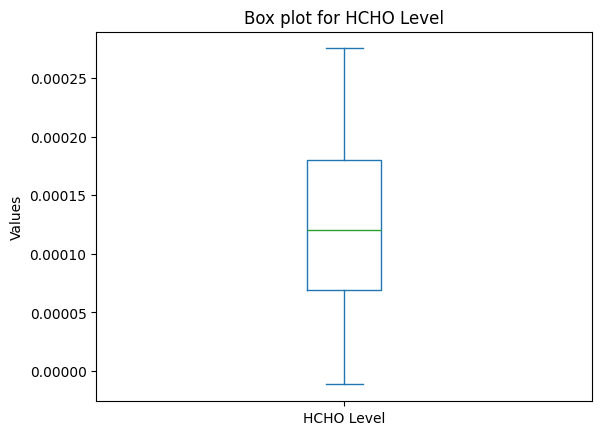

In [132]:
# Box Plot for HCHO level after handling the outliers

# HCHO column
column_to_plot = 'HCHO Level'

kurunegala_data[column_to_plot].plot(kind='box')

# Title and labels
plt.title('Box plot for HCHO Level')
plt.ylabel('Values')

# Display the plot
plt.show()

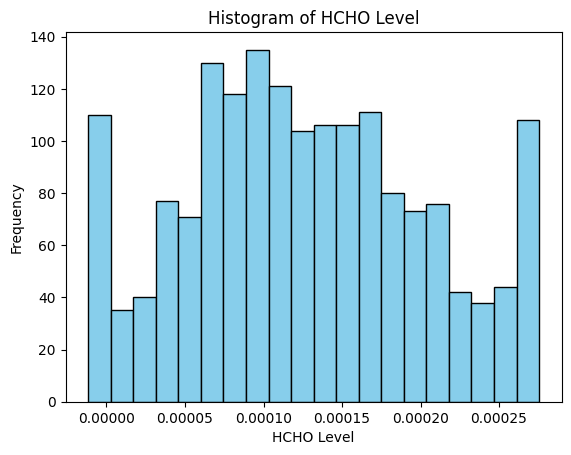

In [133]:
# Plot histogram for 'HCHO Level' column
kurunegala_data['HCHO Level'].plot(kind='hist', bins=20, edgecolor='black', color='skyblue')

# Title and labels
plt.title('Histogram of HCHO Level')
plt.xlabel('HCHO Level')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

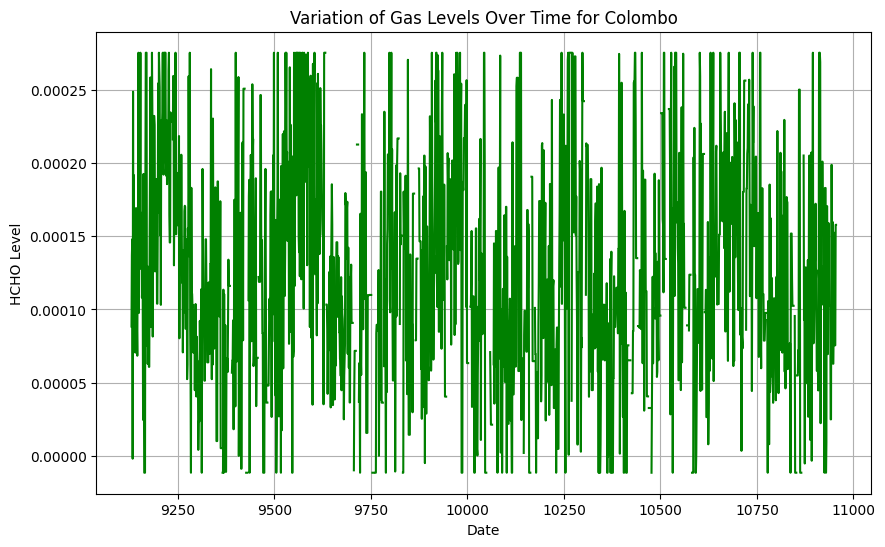

In [134]:
# After handling the outliers in the data.

kurunegala_data.set_index('Date')  # Set 'Start Date' as the index

# Plot the variation of gas levels over time
kurunegala_data['HCHO Level'].plot(figsize=(10, 6), color='green', linestyle='-')

# Customize the plot
plt.title('Variation of Gas Levels Over Time for Kurunegala after handling the outliers')
plt.xlabel('Date')
plt.ylabel('HCHO Level')
plt.grid(True)
plt.show()

# For Jaffna

In [135]:
# Printing Jaffna data
jaffna_data

HCHO Level       Location        Date  Urban Population  \
10956    0.000058  Jaffna Proper  2019-01-01             54994   
10957    0.000102  Jaffna Proper  2019-01-02             54994   
10958    0.000039  Jaffna Proper  2019-01-03             54994   
10959   -0.000002  Jaffna Proper  2019-01-04             54994   
10960    0.000159  Jaffna Proper  2019-01-05             54994   
...           ...            ...         ...               ...   
12777         NaN  Jaffna Proper  2023-12-27             54994   
12778    0.000051  Jaffna Proper  2023-12-28             54994   
12779    0.000127  Jaffna Proper  2023-12-29             54994   
12780    0.000117  Jaffna Proper  2023-12-30             54994   
12781    0.000065  Jaffna Proper  2023-12-31             54994   

       Average Elevation  
10956                  3  
10957                  3  
10958                  3  
10959                  3  
10960                  3  
...                  ...  
12777                  3  
12778                  3  
12779                  3  
12780                  3  
12781                  3  

[1826 rows x 5 columns]

In [136]:
# Checking if there are any missing dates in the Jaffna district
jaffna_data['Date'] = pd.to_datetime(jaffna_data['Date'])

# Get the minimum and maximum dates in the dataset
min_date = jaffna_data['Date'].min()
max_date = jaffna_data['Date'].max()

# Generate a sequence of dates between the minimum and maximum dates
date_range = pd.date_range(start=min_date, end=max_date)

# Check for missing start dates
missing_start_dates = date_range[~date_range.isin(jaffna_data['Date'])]

if len(missing_start_dates) == 0:
    print("No missing start dates found.")
else:
    print("Missing start dates found:")
    print(missing_start_dates)

No missing start dates found.


In [137]:
# Check for missing values in a Jaffna dataset
if jaffna_data['HCHO Level'].isna().any():
    print("There are missing values in the HCHO Level column.")
    print("No of missing values: ", jaffna_data['HCHO Level'].isna().sum())
else:
    print("There are no missing values in the HCHO Level column.")

There are missing values in the HCHO Level column.
No of missing values:  365


In [138]:
# Checking the data type for the Jaffna table
jaffna_data.dtypes

HCHO Level                  float64
Location                     object
Date                 datetime64[ns]
Urban Population              int32
Average Elevation             int32
dtype: object

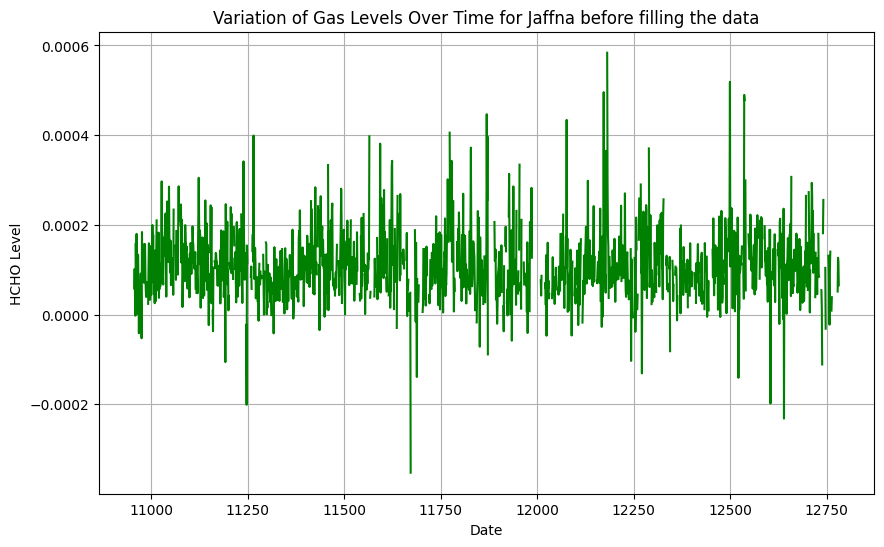

In [139]:
# Before filling in the data

jaffna_data.set_index('Date')  # Set 'Start Date' as the index

# Plot the variation of gas levels over time
jaffna_data['HCHO Level'].plot(figsize=(10, 6), color='green', linestyle='-')

# Customize the plot
plt.title('Variation of Gas Levels Over Time for Jaffna before filling the data')
plt.xlabel('Date')
plt.ylabel('HCHO Level')
plt.grid(True)
plt.show()


### Filling the missing values with the rolling window down method

In [140]:
# Specifing the size of the rolling window
window_size = 3  

# Fill missing values using a rolling-down window method
jaffna_data['HCHO Level'] = jaffna_data['HCHO Level'].fillna(method='ffill', limit=window_size)

In [142]:
# Check for missing values in a specific columns
if jaffna_data['HCHO Level'].isna().any():
    print("There are missing values in the HCHO Level column.")
    print("No of missing values: ", jaffna_data['HCHO Level'].isna().sum())
else:
    print("There are no missing values in the HCHO Level column.")

There are missing values in the HCHO Level column.
No of missing values:  38


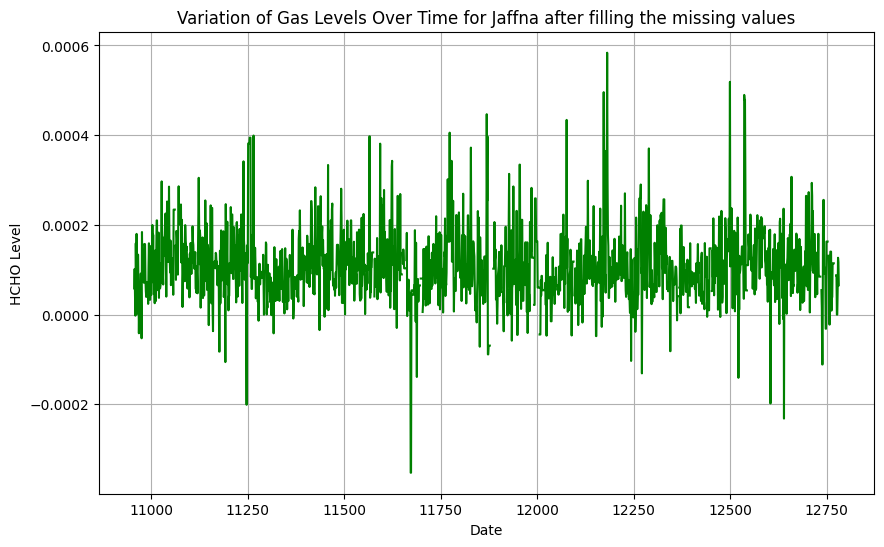

In [143]:
# After filling the data

jaffna_data.set_index('Date')  # Set 'Start Date' as the index

# Plot the variation of gas levels over time
jaffna_data['HCHO Level'].plot(figsize=(10, 6), color='green', linestyle='-')

# Customize the plot
plt.title('Variation of Gas Levels Over Time for Jaffna after filling the missing values')
plt.xlabel('Date')
plt.ylabel('HCHO Level')
plt.grid(True)
plt.show()

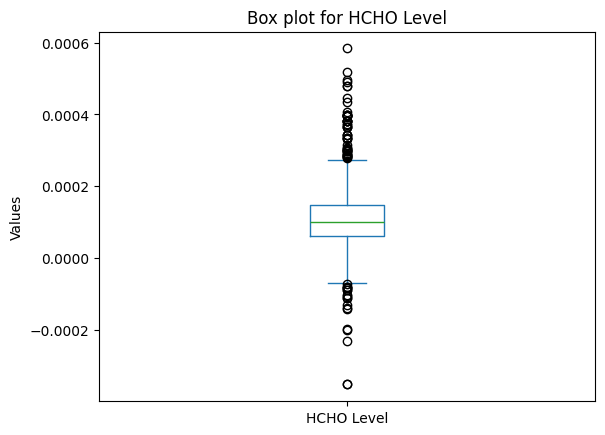

In [144]:
# Box Plot for HCHO level before handling the outliers

# HCHO column
column_to_plot = 'HCHO Level'

jaffna_data[column_to_plot].plot(kind='box')

# Title and labels
plt.title('Box plot for HCHO Level')
plt.ylabel('Values')

# Display the plot
plt.show()

### Calculates and presenting relevant statistics

In [145]:
statistics = jaffna_data.describe().T
statistics

count                 mean                  min  \
HCHO Level         1788.0             0.000108            -0.000352   
Date                 1826  2021-07-01 12:00:00  2019-01-01 00:00:00   
Urban Population   1826.0              54994.0              54994.0   
Average Elevation  1826.0                  3.0                  3.0   

                                   25%                  50%  \
HCHO Level                     0.00006             0.000099   
Date               2020-04-01 06:00:00  2021-07-01 12:00:00   
Urban Population               54994.0              54994.0   
Average Elevation                  3.0                  3.0   

                                   75%                  max       std  
HCHO Level                    0.000147             0.000584  0.000081  
Date               2022-09-30 18:00:00  2023-12-31 00:00:00       NaN  
Urban Population               54994.0              54994.0       0.0  
Average Elevation                  3.0                  3.0       0.0

### Capping the outliers

In [147]:
# Calculate the interquartile range (IQR)
Q1 = jaffna_data['HCHO Level'].quantile(0.25)
Q3 = jaffna_data['HCHO Level'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [148]:
# Cap outliers
jaffna_data['HCHO Level'] = jaffna_data['HCHO Level'].clip(lower=lower_bound, upper=upper_bound)

# Display the DataFrame after capping outliers
jaffna_data

HCHO Level       Location       Date  Urban Population  \
10956  5.830910e-05  Jaffna Proper 2019-01-01             54994   
10957  1.017953e-04  Jaffna Proper 2019-01-02             54994   
10958  3.931331e-05  Jaffna Proper 2019-01-03             54994   
10959 -2.383985e-06  Jaffna Proper 2019-01-04             54994   
10960  1.589137e-04  Jaffna Proper 2019-01-05             54994   
...             ...            ...        ...               ...   
12777 -7.696313e-08  Jaffna Proper 2023-12-27             54994   
12778  5.139770e-05  Jaffna Proper 2023-12-28             54994   
12779  1.267235e-04  Jaffna Proper 2023-12-29             54994   
12780  1.166590e-04  Jaffna Proper 2023-12-30             54994   
12781  6.540853e-05  Jaffna Proper 2023-12-31             54994   

       Average Elevation  
10956                  3  
10957                  3  
10958                  3  
10959                  3  
10960                  3  
...                  ...  
12777                  3  
12778                  3  
12779                  3  
12780                  3  
12781                  3  

[1826 rows x 5 columns]

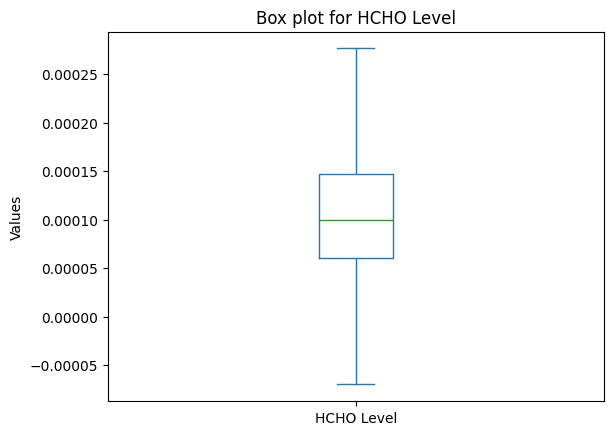

In [149]:
# Box Plot for HCHO level after handling the outliers

# HCHO column
column_to_plot = 'HCHO Level'

jaffna_data[column_to_plot].plot(kind='box')

# Title and labels
plt.title('Box plot for HCHO Level')
plt.ylabel('Values')

# Display the plot
plt.show()

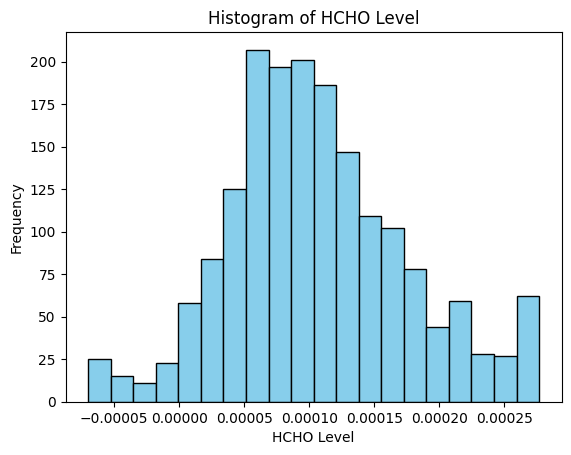

In [150]:
# Plot histogram for 'HCHO Level' column
jaffna_data['HCHO Level'].plot(kind='hist', bins=20, edgecolor='black', color='skyblue')

# Title and labels
plt.title('Histogram of HCHO Level')
plt.xlabel('HCHO Level')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

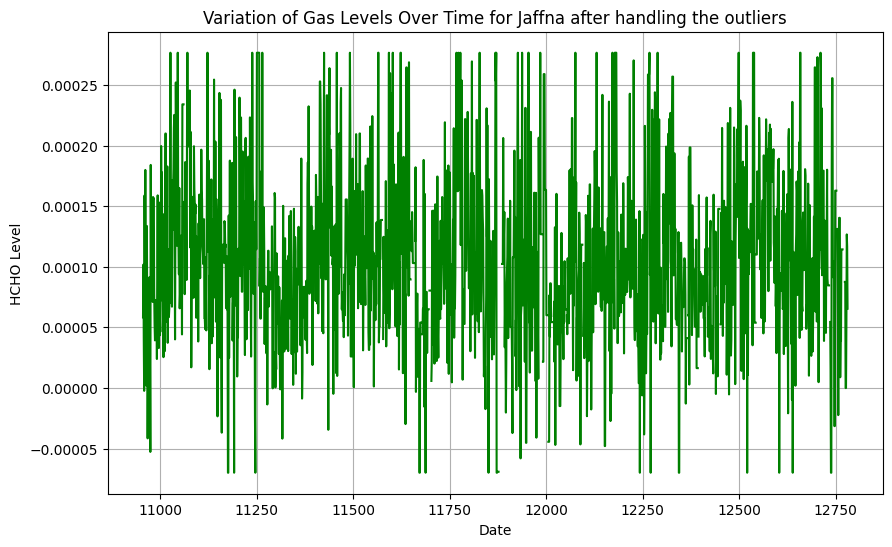

In [152]:
# After handling the outliers in the data

jaffna_data.set_index('Date')  # Set 'Start Date' as the index

# Plot the variation of gas levels over time
jaffna_data['HCHO Level'].plot(figsize=(10, 6), color='green', linestyle='-')

# Customize the plot
plt.title('Variation of Gas Levels Over Time for Jaffna after handling the outliers')
plt.xlabel('Date')
plt.ylabel('HCHO Level')
plt.grid(True)
plt.show()